In [ ]:
# install package
!pip install tensorflow
!pip install torch
!pip install torchvision
!pip install pillow

# **Îî•Îü¨Îãù ÌîÑÎ†àÏûÑÏõåÌÅ¨ (Deep Learning Framework)**
**[ 7Ï£ºÏ∞®Ïóê Ïù¥Ïñ¥ÏÑú ]**

### **Î™®Îç∏ Í∞ÄÏ§ëÏπò ÌôïÏù∏**

#### **Tensorflow (Keras)**

In [ ]:
import tensorflow as tf
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential, Model

In [ ]:
# Î™®Îç∏ ÏÉùÏÑ± (ÏòàÏãúÎäî Sequntial API Î™®Îç∏Ïù¥ÏßÄÎßå Functional API, Subclassing API Î™®Îç∏ÎèÑ ÎòëÍ∞ôÏù¥ Í∞ÄÎä•)
model = Sequential([layers.Input(shape=(28,28), name="Input"),
                    layers.Flatten(name="Flatten"),
                    layers.Dense(5, activation='relu', name="Dense1"),
                    layers.Dense(5, activation='relu', name="Dense2"),
                    layers.Dense(1, activation='sigmoid', name="Output")])

In [ ]:
# ÌäπÏ†ï Î†àÏù¥Ïñ¥ Í∞ÄÏ§ëÏπò ÌôïÏù∏
layer = model.get_layer("Dense2")  # model.layers[2]ÏôÄ Í∞ôÏùÄ Í≤∞Í≥º
print(f"Dense2 Weights:\n{layer.get_weights()[0]}\n")
print(f"Dense2 bias:\n{layer.get_weights()[1]}")

Dense2 Weights:
[[-0.3361545  -0.6816075  -0.49579978  0.18425697 -0.1818549 ]
 [ 0.13900328 -0.22437572 -0.02935386 -0.31069824  0.06200075]
 [-0.6161269   0.6333586  -0.5215648  -0.5134951  -0.36727497]
 [ 0.35289204 -0.5259516  -0.51687783 -0.3853003   0.2929741 ]
 [ 0.69874656  0.63102543  0.25500166 -0.01300967 -0.2822905 ]]

Dense2 bias:
[0. 0. 0. 0. 0.]


#### **Pytorch**

In [ ]:
import torch as th
import torch.nn as nn

In [ ]:
class MyModel(nn.Module):

  def __init__(self, input_shape=(28,28)):
    super(MyModel, self).__init__()
    self.flatten_layer = nn.Flatten()
    self.dense1_layer = nn.Sequential(nn.Linear(input_shape[0]*input_shape[1],5), nn.ReLU())
    self.dense2_layer = nn.Sequential(nn.Linear(5,5), nn.ReLU())
    self.output_layer = nn.Sequential(nn.Linear(5,1))

  def forward(self, x):
    x = self.flatten_layer(x)
    x = self.dense1_layer(x)
    x = self.dense2_layer(x)
    x = self.output_layer(x)
    return x

# Î™®Îç∏ ÏÉùÏÑ±
model = MyModel()

In [ ]:
# Î™®Îç∏ Í∞ÄÏ§ëÏπò ÌôïÏù∏
print("Model's parameters:")
model.state_dict()                  # list(model.parameters())Î•º ÏÇ¨Ïö©ÌïòÎ©¥ valueÎßå Î≥º Ïàò ÏûàÏùå

Model's parameters:


OrderedDict([('dense1_layer.0.weight',
              tensor([[ 0.0008, -0.0028, -0.0166,  ..., -0.0224, -0.0280, -0.0001],
                      [ 0.0319, -0.0132, -0.0144,  ...,  0.0163,  0.0084,  0.0078],
                      [ 0.0114, -0.0155, -0.0048,  ..., -0.0308,  0.0341, -0.0134],
                      [ 0.0081,  0.0089,  0.0265,  ..., -0.0008,  0.0001,  0.0227],
                      [-0.0243,  0.0284, -0.0119,  ..., -0.0139, -0.0216,  0.0231]])),
             ('dense1_layer.0.bias',
              tensor([ 0.0270,  0.0263,  0.0312, -0.0349, -0.0285])),
             ('dense2_layer.0.weight',
              tensor([[-0.2936,  0.3252, -0.1487,  0.2618,  0.1797],
                      [-0.3501,  0.4297, -0.2526,  0.1982, -0.1842],
                      [ 0.2105, -0.1438, -0.1903, -0.2209,  0.3249],
                      [ 0.3688,  0.0186,  0.3660,  0.4415, -0.0809],
                      [ 0.1329,  0.2266, -0.0225,  0.2993,  0.4307]])),
             ('dense2_layer.0.bias',
       

### **Î™®Îç∏ Ï†ÄÏû•Í≥º Î≥µÏõê**

In [ ]:
# Î™®Îç∏ Ï†ÄÏû•ÏùÑ ÏúÑÌïú ÎîîÎ†âÌÜ†Î¶¨ ÏÉùÏÑ±
import os

if not os.path.exists("tf_model/"):
  os.makedirs("tf_model/")
if not os.path.exists("th_model/"):
  os.makedirs("th_model/")

#### **Tensorflow (Keras)**


- Î™®Îç∏ Ï†ÑÏ≤¥ (Íµ¨Ï°∞, Í∞ÄÏ§ëÏπò, Ïª¥ÌååÏùº Ï†ïÎ≥¥, ÏòµÌã∞ÎßàÏù¥Ï†ÄÏôÄ Í∑∏ ÏÉÅÌÉú) Ï†ÄÏû• Î∞è Î∂àÎü¨Ïò§Í∏∞
    - `model.save(file_path)`: Î™®Îç∏ Ï†ÑÏ≤¥ Ï†ÄÏû•ÌïòÍ∏∞
    - `tf.keras.models.load_model(file_path)`: Î™®Îç∏ Ï†ÑÏ≤¥ Î∂àÎü¨Ïò§Í∏∞
    - `SavedModel` ÎòêÎäî `HDF5` ÌååÏùº ÌòïÏãù ÏÇ¨Ïö©

- Î™®Îç∏ Í∞ÄÏ§ëÏπò Ï†ÄÏû• Î∞è Î∂àÎü¨Ïò§Í∏∞
    - `model.save_weights(file_path)`: Î™®Îç∏ Í∞ÄÏ§ëÏπò Ï†ÄÏû•ÌïòÍ∏∞
    - `model.load_weights(file_path)`: Î™®Îç∏ Í∞ÄÏ§ëÏπò Î∂àÎü¨Ïò§Í∏∞ (Îã®, Î™®Îç∏ Íµ¨Ï°∞Í∞Ä ÏùºÏπòÌï¥Ïïº Ìï®)
    - `.ckpt` ÌôïÏû•ÏûêÍ∞Ä ÏûàÎäî Tensorflow Checkpoint ÌòïÏãù ÏÇ¨Ïö©

- Î™®Îç∏ Íµ¨Ï°∞ Ï†ÄÏû• Î∞è Î∂àÎü¨Ïò§Í∏∞
    - `model.to_json()`: Î™®Îç∏ Íµ¨Ï°∞Î•º json ÌååÏùº ÌòïÏãùÏúºÎ°ú Ï†ÄÏû•Ìï† Îïå ÏÇ¨Ïö©
    - `tf.keras.models.model_from_json(file_path)`: json ÌååÏùºÎ°úÎ∂ÄÌÑ∞ Î™®Îç∏ Íµ¨Ï°∞ Î∂àÎü¨Ïò§Í∏∞

In [ ]:
import numpy as np
import tensorflow as tf
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential, Model
from sklearn.model_selection import train_test_split
from tensorflow.keras.datasets import mnist

In [ ]:
# MNIST Îç∞Ïù¥ÌÑ∞ÏÖã Î∂àÎü¨Ïò§Í∏∞
(X_train, y_train),(X_test, y_test) = mnist.load_data()

# ÌõàÎ†® Îç∞Ïù¥ÌÑ∞Ïùò 30%Î•º Í≤ÄÏ¶ù Îç∞Ïù¥ÌÑ∞Î°ú ÏÇ¨Ïö©
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.3, random_state=0)

# Îç∞Ïù¥ÌÑ∞ Ï†ÑÏ≤òÎ¶¨
X_train = X_train.astype("float32") / 255
X_val = X_val.astype("float32") / 255
X_test = X_test.astype("float32") / 255

11490434/11490434 [==============================] - 0s 0us/step


**Sequential API &#160; & &#160; Functional API**

In [ ]:
# Î™®Îç∏ ÏÉùÏÑ± (ÏòàÏãúÎäî Squential API Ïù¥ÏßÄÎßå Functional APIÎèÑ Í∞ÄÎä•Ìï®)
model = Sequential([layers.Input(shape=(28,28), name="Input"),
                    layers.Flatten(name="Flatten"),
                    layers.Dense(100, activation='relu', name="Dense1"),
                    layers.Dense(100, activation='relu', name="Dense2"),
                    layers.Dense(10, activation='softmax', name="Output")])

# Î™®Îç∏ Ïª¥ÌååÏùº
model.compile(loss='sparse_categorical_crossentropy', optimizer='sgd', metrics=['accuracy'])

# Î™®Îç∏ ÌõàÎ†®
model.fit(X_train, y_train, epochs=10, batch_size=128, validation_data=(X_val, y_val), verbose=1)

Epoch 1/10
329/329 [==============================] - 3s 7ms/step - loss: 1.5412 - accuracy: 0.6061 - val_loss: 0.8595 - val_accuracy: 0.8018
Epoch 2/10
329/329 [==============================] - 2s 6ms/step - loss: 0.6533 - accuracy: 0.8426 - val_loss: 0.5249 - val_accuracy: 0.8625
Epoch 3/10
329/329 [==============================] - 2s 6ms/step - loss: 0.4690 - accuracy: 0.8764 - val_loss: 0.4248 - val_accuracy: 0.8839
Epoch 4/10
329/329 [==============================] - 2s 5ms/step - loss: 0.3995 - accuracy: 0.8912 - val_loss: 0.3776 - val_accuracy: 0.8948
Epoch 5/10
329/329 [==============================] - 2s 6ms/step - loss: 0.3616 - accuracy: 0.8998 - val_loss: 0.3515 - val_accuracy: 0.8999
Epoch 6/10
329/329 [==============================] - 3s 8ms/step - loss: 0.3366 - accuracy: 0.9057 - val_loss: 0.3346 - val_accuracy: 0.9057
Epoch 7/10
329/329 [==============================] - 2s 6ms/step - loss: 0.3177 - accuracy: 0.9105 - val_loss: 0.3103 - val_accuracy: 0.9114
Epoch 

In [ ]:
# Î™®Îç∏ ÌèâÍ∞Ä
_ , accuracy = model.evaluate(X_test, y_test)
print(f"Accuracy: {accuracy}")

313/313 [==============================] - 1s 2ms/step - loss: 0.2676 - accuracy: 0.9249
Accuracy: 0.9248999953269958


In [ ]:
# Î™®Îç∏ Ï†ÑÏ≤¥ Ï†ÄÏû•
model.save("tf_model/model_seq")          # SavedModel ÌååÏùº ÌòïÏãù
model.save("tf_model/model_seq.h5")       # HDF5 ÌååÏùº ÌòïÏãù

# Î™®Îç∏ Í∞ÄÏ§ëÏπò Ï†ÄÏû•
model.save_weights("tf_model/model_seq_weights")

# Î™®Îç∏ Íµ¨Ï°∞ Ï†ÄÏû•
model_json = model.to_json()              # json ÌòïÏãù
with open('tf_model/model_seq.json', 'w') as f:
  f.write(model_json)

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [ ]:
# Î™®Îç∏ Î∂àÎü¨Ïò§Í∏∞ Î∞è Î∂àÎü¨Ïò® Î™®Îç∏ ÌèâÍ∞Ä (1)
print("=== load_model() Ïù¥Ïö© ===")
loaded_model = tf.keras.models.load_model("tf_model/model_seq")     # HDF5 ÌååÏùº("model_seq.h5")ÏùÑ ÏÇ¨Ïö©Ìï¥ÎèÑ ÎèôÏùºÌïú Í≤∞Í≥ºÎ•º ÏñªÏùÑ Ïàò ÏûàÏùå
print(f"Loaded Model Accuracy: {loaded_model.evaluate(X_test, y_test)[1]}")

=== load_model() Ïù¥Ïö© ===
313/313 [==============================] - 1s 2ms/step - loss: 0.2676 - accuracy: 0.9249
Loaded Model Accuracy: 0.9248999953269958


In [ ]:
# Î™®Îç∏ Î∂àÎü¨Ïò§Í∏∞ Î∞è Î∂àÎü¨Ïò® Î™®Îç∏ ÌèâÍ∞Ä (2)
print("=== load_weights() Ïù¥Ïö© ===")
loaded_model = Sequential([layers.Input(shape=(28,28), name="Input"),
                           layers.Flatten(name="Flatten"),
                           layers.Dense(100, activation='relu', name="Dense1"),
                           layers.Dense(100, activation='relu', name="Dense2"),
                           layers.Dense(10, activation='softmax', name="Output")])    # Î™®Îç∏ ÏÉùÏÑ± (Íµ¨Ï°∞)
loaded_model.load_weights("tf_model/model_seq_weights")                               # Î™®Îç∏ Í∞ÄÏ§ëÏπò Î∂àÎü¨Ïò§Í∏∞
loaded_model.compile(loss='sparse_categorical_crossentropy',     # load_weights() Ìï®ÏàòÎäî Ïª¥ÌååÏùº Ï†ïÎ≥¥Î•º Î∂àÎü¨Ïò§ÏßÄ ÏïäÍ∏∞ ÎïåÎ¨∏Ïóê,
                     optimizer='sgd',                            # evaluate() Ìï®ÏàòÎ•º ÏÇ¨Ïö©ÌïòÎ†§Î©¥ Î™®Îç∏ÏùÑ ÏÉàÎ°≠Í≤å Ïª¥ÌååÏùº Ìï¥Ï§òÏïº Ìï®
                     metrics=['accuracy'])                       # predict() Ìï®ÏàòÎäî Ïª¥ÌååÏùº ÏóÜÏù¥ ÏÇ¨Ïö© Í∞ÄÎä•
print(f"Loaded Model Accuracy: {loaded_model.evaluate(X_test, y_test)[1]}")

=== load_weights() Ïù¥Ïö© ===
313/313 [==============================] - 1s 3ms/step - loss: 0.2676 - accuracy: 0.9249
Loaded Model Accuracy: 0.9248999953269958


In [ ]:
# Î™®Îç∏ Î∂àÎü¨Ïò§Í∏∞ Î∞è Î∂àÎü¨Ïò® Î™®Îç∏ ÌèâÍ∞Ä (3)
print("=== load_weights(), model_from_json() Ïù¥Ïö© ===")
f = open("tf_model/model_seq.json", "r")
model_json = f.read()
f.close()
loaded_model = tf.keras.models.model_from_json(model_json)            # Î™®Îç∏ ÏÉùÏÑ± (Íµ¨Ï°∞)
loaded_model.load_weights("tf_model/model_seq_weights")               # Î™®Îç∏ Í∞ÄÏ§ëÏπò Î∂àÎü¨Ïò§Í∏∞
loaded_model.compile(loss='sparse_categorical_crossentropy',
                     optimizer='sgd',
                     metrics=['accuracy'])
print(f"Loaded Model Accuracy: {loaded_model.evaluate(X_test, y_test)[1]}")

=== load_weights(), model_from_json() Ïù¥Ïö© ===
313/313 [==============================] - 1s 2ms/step - loss: 0.2676 - accuracy: 0.9249
Loaded Model Accuracy: 0.9248999953269958


**Subclassing API**

In [ ]:
class MyModel(Model):

  def __init__(self):
    super(MyModel, self).__init__()
    self.flatten_layer = layers.Flatten(name="Flatten")
    self.dense1_layer = layers.Dense(100, activation="relu", name="Dense1")
    self.dense2_layer = layers.Dense(100, activation="relu", name="Dense2")
    self.output_layer = layers.Dense(10, activation="softmax", name="Output")

  def build(self, input_shape):
    super(MyModel, self).build(input_shape)

  def call(self, x):
    x = self.flatten_layer(x)
    x = self.dense1_layer(x)
    x = self.dense2_layer(x)
    x = self.output_layer(x)
    return x

In [ ]:
# Î™®Îç∏ ÏÉùÏÑ±
model = MyModel()
model.build(input_shape=(None,28,28))

# Î™®Îç∏ Ïª¥ÌååÏùº
model.compile(loss='sparse_categorical_crossentropy', optimizer='sgd', metrics=['accuracy'])

# Î™®Îç∏ ÌõàÎ†®
history = model.fit(X_train, y_train, epochs=10, batch_size=128, validation_data=(X_val, y_val), verbose=1)

Epoch 1/10
329/329 [==============================] - 3s 6ms/step - loss: 1.6460 - accuracy: 0.5621 - val_loss: 0.9622 - val_accuracy: 0.7849
Epoch 2/10
329/329 [==============================] - 2s 6ms/step - loss: 0.6980 - accuracy: 0.8310 - val_loss: 0.5412 - val_accuracy: 0.8607
Epoch 3/10
329/329 [==============================] - 2s 5ms/step - loss: 0.4752 - accuracy: 0.8742 - val_loss: 0.4269 - val_accuracy: 0.8848
Epoch 4/10
329/329 [==============================] - 2s 6ms/step - loss: 0.3995 - accuracy: 0.8914 - val_loss: 0.3769 - val_accuracy: 0.8949
Epoch 5/10
329/329 [==============================] - 2s 6ms/step - loss: 0.3608 - accuracy: 0.8991 - val_loss: 0.3484 - val_accuracy: 0.9012
Epoch 6/10
329/329 [==============================] - 3s 8ms/step - loss: 0.3358 - accuracy: 0.9045 - val_loss: 0.3263 - val_accuracy: 0.9075
Epoch 7/10
329/329 [==============================] - 2s 6ms/step - loss: 0.3169 - accuracy: 0.9095 - val_loss: 0.3207 - val_accuracy: 0.9065
Epoch 

In [ ]:
# Î™®Îç∏ ÌèâÍ∞Ä
_ , accuracy = model.evaluate(X_test, y_test)
print(f"Accuracy: {accuracy}")

313/313 [==============================] - 1s 2ms/step - loss: 0.2658 - accuracy: 0.9224
Accuracy: 0.9223999977111816


In [ ]:
# Î™®Îç∏ Ï†ÑÏ≤¥ Ï†ÄÏû•
model.save("tf_model/model_sub")       # SavedModel ÌååÏùº ÌòïÏãù

# Î™®Îç∏ Í∞ÄÏ§ëÏπò Ï†ÄÏû•
model.save_weights("tf_model/model_sub_weights")

In [ ]:
# Î™®Îç∏ Î∂àÎü¨Ïò§Í∏∞ Î∞è Î∂àÎü¨Ïò® Î™®Îç∏ ÌèâÍ∞Ä (1)
print("=== load_model() Ïù¥Ïö© ===")
loaded_model = tf.keras.models.load_model("tf_model/model_sub")      # Î™®Îç∏ Ï†ÑÏ≤¥ Î∂àÎü¨Ïò§Í∏∞
print(f"Loaded Model Accuracy: {loaded_model.evaluate(X_test, y_test)[1]}")

=== load_model() Ïù¥Ïö© ===
313/313 [==============================] - 1s 3ms/step - loss: 0.2658 - accuracy: 0.9224
Loaded Model Accuracy: 0.9223999977111816


In [ ]:
# Î™®Îç∏ Î∂àÎü¨Ïò§Í∏∞ Î∞è Î∂àÎü¨Ïò® Î™®Îç∏ ÌèâÍ∞Ä (2)
print("=== load_weights() Ïù¥Ïö© ===")
loaded_model = MyModel()                                             # Î™®Îç∏ ÏÉùÏÑ± (Íµ¨Ï°∞)
loaded_model.build(input_shape=(None,28,28))                         # Î™®Îç∏ Í∞ÄÏ§ëÏπò Ï¥àÍ∏∞Ìôî
loaded_model.load_weights("tf_model/model_sub_weights")              # Î™®Îç∏ Í∞ÄÏ§ëÏπò Î∂àÎü¨Ïò§Í∏∞
loaded_model.compile(loss='sparse_categorical_crossentropy',
                     optimizer='sgd',
                     metrics=['accuracy'])
print(f"Loaded Model Accuracy: {loaded_model.evaluate(X_test, y_test)[1]}")

=== load_weights() Ïù¥Ïö© ===
313/313 [==============================] - 1s 3ms/step - loss: 0.2658 - accuracy: 0.9224
Loaded Model Accuracy: 0.9223999977111816


#### **PyTorch**

- `.pt` ÎòêÎäî `.pth` ÌôïÏû•ÏûêÎ•º ÏÇ¨Ïö©ÌïòÏó¨ Ï†ÄÏû•

- Î™®Îç∏ Ï†ÑÏ≤¥(Íµ¨Ï°∞, Í∞ÄÏ§ëÏπò) Ï†ÄÏû• Î∞è Î∂àÎü¨Ïò§Í∏∞
    - `th.save(model, file_path)`: Î™®Îç∏ Ï†ÑÏ≤¥ Ï†ÄÏû•ÌïòÍ∏∞
    - `th.load(file_path)`: Î™®Îç∏ Ï†ÑÏ≤¥ Î∂àÎü¨Ïò§Í∏∞

- Î™®Îç∏Ïùò Í∞ÄÏ§ëÏπò Ï†ÄÏû• Î∞è Î∂àÎü¨Ïò§Í∏∞
    - `th.save(model.state_dict(), file_path)`: Î™®Îç∏ Í∞ÄÏ§ëÏπò Ï†ÄÏû•ÌïòÍ∏∞
    - `model.load_state_dict(th.load(file_path))`: Î™®Îç∏ Í∞ÄÏ§ëÏπò Î∂àÎü¨Ïò§Í∏∞




In [ ]:
import numpy as np
import torch as th
import torch.nn as nn
from torch.utils.data import TensorDataset, DataLoader
from sklearn.model_selection import train_test_split
from tensorflow.keras.datasets import mnist

In [ ]:
# MNIST Îç∞Ïù¥ÌÑ∞ÏÖã Î∂àÎü¨Ïò§Í∏∞
(X_train, y_train),(X_test, y_test) = mnist.load_data()

# ÌõàÎ†® Îç∞Ïù¥ÌÑ∞Ïùò 30%Î•º Í≤ÄÏ¶ù Îç∞Ïù¥ÌÑ∞Î°ú ÏÇ¨Ïö©
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.3, random_state=0)

# Îç∞Ïù¥ÌÑ∞ Ï†ÑÏ≤òÎ¶¨
X_train = X_train.astype("float32") / 255
X_val = X_val.astype("float32") / 255
X_test = X_test.astype("float32") / 255

# Dataloader ÏÉùÏÑ±
train_dataset = TensorDataset(th.from_numpy(X_train), th.from_numpy(y_train))
train_dataloader = DataLoader(train_dataset, batch_size=128, shuffle=True)
val_dataset = TensorDataset(th.from_numpy(X_val), th.from_numpy(y_val))
val_dataloader = DataLoader(val_dataset, batch_size=128, shuffle=False)

In [ ]:
class MyModel(nn.Module):

  def __init__(self, input_shape=(28,28)):
    super(MyModel, self).__init__()
    self.flatten_layer = nn.Flatten()
    self.dense1_layer = nn.Sequential(nn.Linear(input_shape[0]*input_shape[1],100), nn.ReLU())
    self.dense2_layer = nn.Sequential(nn.Linear(100,100), nn.ReLU())
    self.output_layer = nn.Sequential(nn.Linear(100,10))

  def forward(self, x):
    x = self.flatten_layer(x)
    x = self.dense1_layer(x)
    x = self.dense2_layer(x)
    x = self.output_layer(x)
    return x

# Î™®Îç∏ ÏÉùÏÑ±
model = MyModel()

# ÏÜêÏã§ Ìï®Ïàò, ÏòµÌã∞ÎßàÏù¥Ï†Ä ÏÑ§Ï†ï
loss = nn.CrossEntropyLoss()
optimizer = th.optim.SGD(model.parameters(), lr=0.05)

In [ ]:
# Î™®Îç∏ ÌõàÎ†®
epochs = 10

for i in range(epochs):

  train_losses_iter, val_losses_iter = [], []

  for X, y in train_dataloader:

    model.train()
    y_pred = model(X)
    train_loss = loss(y_pred, y)
    train_losses_iter.append(train_loss.item())

    train_loss.backward()
    optimizer.step()
    optimizer.zero_grad()

  for X, y in val_dataloader:

    model.eval()
    with th.no_grad():
      y_pred = model(X)
      val_loss = loss(y_pred, y)
      val_losses_iter.append(val_loss.item())

  train_loss_epoch = np.array(train_losses_iter).mean()
  val_loss_epoch = np.array(val_losses_iter).mean()

  print(f"Epoch {i+1}/{epochs}   train_loss: {round(train_loss_epoch, 4)}   val_loss: {round(val_loss_epoch, 4)}\n")

Epoch 1/10   train_loss: 1.1541   val_loss: 0.4792

Epoch 2/10   train_loss: 0.3873   val_loss: 0.3908

Epoch 3/10   train_loss: 0.3202   val_loss: 0.4761

Epoch 4/10   train_loss: 0.2802   val_loss: 0.2937

Epoch 5/10   train_loss: 0.2497   val_loss: 0.2662

Epoch 6/10   train_loss: 0.224   val_loss: 0.2408

Epoch 7/10   train_loss: 0.2033   val_loss: 0.2017

Epoch 8/10   train_loss: 0.1852   val_loss: 0.1952

Epoch 9/10   train_loss: 0.1703   val_loss: 0.1838

Epoch 10/10   train_loss: 0.1565   val_loss: 0.1669



In [ ]:
# Î™®Îç∏ ÌèâÍ∞Ä
test_dataset = TensorDataset(th.from_numpy(X_test), th.from_numpy(y_test))
test_dataloader = DataLoader(test_dataset, batch_size=128, shuffle=True)

model.eval()
with th.no_grad():
  correct = 0
  for X, y in test_dataloader:
    correct += (y == th.argmax(model(X), dim=1)).sum()
accuracy = correct / len(test_dataset)

print(f"Accuracy: {accuracy}")

Accuracy: 0.953000009059906


In [ ]:
# Î™®Îç∏ Ï†ÄÏû•
th.save(model, "th_model/model_th.pth")                           # Î™®Îç∏ Ï†ÑÏ≤¥ Ï†ÄÏû• (.pt ÌôïÏû•ÏûêÎèÑ ÏÇ¨Ïö© Í∞ÄÎä•)
th.save(model.state_dict(), "th_model/model_state_dict.pth")      # Î™®Îç∏ Í∞ÄÏ§ëÏπò Ï†ÄÏû• (.pt ÌôïÏû•ÏûêÎèÑ ÏÇ¨Ïö© Í∞ÄÎä•)

In [ ]:
# Î™®Îç∏ Î∂àÎü¨Ïò§Í∏∞ Î∞è Î∂àÎü¨Ïò® Î™®Îç∏ ÌèâÍ∞Ä (1)
loaded_model = th.load("th_model/model_th.pth")    # Î™®Îç∏ Ï†ÑÏ≤¥ Î∂àÎü¨Ïò§Í∏∞ (Îã®, MyModel ÌÅ¥ÎûòÏä§Í∞Ä Î™®Îç∏ÏùÑ Ï†ÄÏû•Ìï† ÎïåÏôÄ Í∞ôÍ≤å Ï†ïÏùòÎêòÏñ¥ ÏûàÏñ¥Ïïº Ìï®)
loaded_model.eval()
with th.no_grad():
  correct = 0
  for X, y in test_dataloader:
    correct += (y == th.argmax(loaded_model(X), dim=1)).sum()
accuracy = correct / len(test_dataset)
print(f"Loaded Model Accuracy: {accuracy}")

Loaded Model Accuracy: 0.953000009059906


In [ ]:
# Î™®Îç∏ Î∂àÎü¨Ïò§Í∏∞ Î∞è Î∂àÎü¨Ïò® Î™®Îç∏ ÌèâÍ∞Ä (2)
loaded_model = MyModel()                                                  # Î™®Îç∏ ÏÉùÏÑ±(Íµ¨Ï°∞)
loaded_model.load_state_dict(th.load("th_model/model_state_dict.pth"))    # Î™®Îç∏ Í∞ÄÏ§ëÏπò Î∂àÎü¨Ïò§Í∏∞
loaded_model.eval()
with th.no_grad():
  correct = 0
  for X, y in test_dataloader:
    correct += (y == th.argmax(nn.Softmax(dim=1)(loaded_model(X)), dim=1)).sum()
accuracy = correct / len(test_dataset)
print(f"Loaded Model Accuracy: {accuracy}")

Loaded Model Accuracy: 0.953000009059906


### **ÏΩúÎ∞± (Callback)**

- Î™®Îç∏ÏùÑ ÌõàÎ†®ÏãúÌÇ§Îäî ÎèôÏïà Ïñ¥Îñ§ Ïù¥Î≤§Ìä∏Í∞Ä Î∞úÏÉùÌïòÎ©¥ Í∞úÎ∞úÏûêÍ∞Ä ÏõêÌïòÎäî ÎèôÏûëÏùÑ ÏàòÌñâÌï† Ïàò ÏûàÍ≤å Ìï®
- Tensorflow (Keras)ÏóêÏÑú `fit()` Ìï®ÏàòÏùò callbacks Ïù∏ÏûêÏóê Í∞ùÏ≤¥ Î¶¨Ïä§Ìä∏Î•º ÏßÄÏ†ïÌïòÏó¨ ÏÇ¨Ïö© (Ìïú Î≤àÏóê Ïó¨Îü¨ Ï¢ÖÎ•ò ÏÇ¨Ïö© Í∞ÄÎä•)
- PytorchÏóêÏÑúÎäî ÏΩúÎ∞± Î™®ÎìàÏù¥ ÏóÜÏñ¥ ÏßÅÏ†ë Íµ¨ÌòÑÌï¥ÏÑú ÏÇ¨Ïö©Ìï¥Ïïº Ìï®

In [ ]:
import tensorflow as tf
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential, Model
from sklearn.model_selection import train_test_split
from tensorflow.keras.datasets import mnist

In [ ]:
# MNIST Îç∞Ïù¥ÌÑ∞ÏÖã Î∂àÎü¨Ïò§Í∏∞
(X_train, y_train),(X_test, y_test) = mnist.load_data()

# ÌõàÎ†® Îç∞Ïù¥ÌÑ∞Ïùò 30%Î•º Í≤ÄÏ¶ù Îç∞Ïù¥ÌÑ∞Î°ú ÏÇ¨Ïö©
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.3, random_state=0)

# Îç∞Ïù¥ÌÑ∞ Ï†ÑÏ≤òÎ¶¨
X_train = X_train.astype("float32") / 255
X_val = X_val.astype("float32") / 255
X_test = X_test.astype("float32") / 255

In [ ]:
class MyModel(Model):

  def __init__(self):
    super(MyModel, self).__init__()
    self.flatten_layer = layers.Flatten(name="Flatten")
    self.dense1_layer = layers.Dense(100, activation="relu", name="Dense1")
    self.dense2_layer = layers.Dense(100, activation="relu", name="Dense2")
    self.output_layer = layers.Dense(10, activation="softmax", name="Output")

  def build(self, input_shape):
    super(MyModel, self).build(input_shape)

  def call(self, x):
    x = self.flatten_layer(x)
    x = self.dense1_layer(x)
    x = self.dense2_layer(x)
    x = self.output_layer(x)
    return x

#### **EarlyStopping**

- Î™®Îç∏ ÏÑ±Îä•Ïù¥ ÏùºÏ†ï `patience` Ïàò ÎèôÏïà Í∞úÏÑ†ÎêòÏßÄ ÏïäÏùÑ Îïå ÌõàÎ†® Ï§ëÎã®
- Î™®Îç∏Ïù¥ Ìñ•ÏÉÅÎêòÏßÄ ÏïäÏúºÎ©¥ ÌõàÎ†®Ïù¥ ÏûêÎèôÏúºÎ°ú Ï§ëÏßÄÎêòÎØÄÎ°ú, `epochs` Ïà´ÏûêÎ•º ÌÅ¨Í≤å Ìï¥ÎèÑ Î¨¥Î∞©
- ÌõàÎ†®Ïù¥ Ï§ëÎã®Îêú ÌõÑÏùò ÏµúÏÉÅÏùò Í∞ÄÏ§ëÏπòÎ•º Î≥µÏõêÌïòÍ∏∞ ÎïåÎ¨∏Ïóê Î™®Îç∏ÏùÑ Îî∞Î°ú Î≥µÏõêÌï† ÌïÑÏöî ÏóÜÏùå

In [ ]:
# EarlyStopping Í∞ùÏ≤¥ ÏÉùÏÑ±
from tensorflow.keras.callbacks import EarlyStopping

early_stopping = EarlyStopping(monitor="val_loss",           # Î™®ÎãàÌÑ∞ÎßÅÌï† ÏßÄÌëú
                               patience=3,                   # patience Ïàò ÎèôÏïà Î™®ÎãàÌÑ∞ÎßÅÌïòÎäî ÏßÄÌëúÍ∞Ä Ï¢ãÏïÑÏßÄÏßÄ ÏïäÏúºÎ©¥ ÌõàÎ†® Ï§ëÎã®
                               verbose=1,                    # 1: Í≤∞Í≥º Ï∂úÎ†• / 0: Í≤∞Í≥º Ï∂úÎ†• X
                               restore_best_weights=True)    # True: ÌõàÎ†®Ïù¥ Ï§ëÎã®ÎêòÍ≥† Î™®ÎãàÌÑ∞ÎßÅÌïòÎäî ÏßÄÌëúÍ∞Ä Í∞ÄÏû• Ï¢ãÏïòÏùÑ ÎñÑÏùò Î™®Îç∏ Í∞ÄÏ§ëÏπò Î≥µÏõê /
                                                             # False: ÌõàÎ†®Ïù¥ Ï§ëÎã®Îêú ÌõÑÏùò Î™®Îç∏Ïùò Í∞ÄÏ§ëÏπò Í∑∏ÎåÄÎ°ú Ï†ÅÏö©

In [ ]:
# Î™®Îç∏ ÏÉùÏÑ±
model = MyModel()
model.build(input_shape=(None,28,28))

# Î™®Îç∏ Ïª¥ÌååÏùº
model.compile(loss="sparse_categorical_crossentropy", optimizer="adam", metrics=["accuracy"])

# Î™®Îç∏ ÌõàÎ†®
model.fit(X_train, y_train, epochs=15, batch_size=128, validation_data=(X_val, y_val),
          verbose=1, callbacks=[early_stopping])

Epoch 1/15
329/329 [==============================] - 3s 6ms/step - loss: 0.4005 - accuracy: 0.8866 - val_loss: 0.2234 - val_accuracy: 0.9336
Epoch 2/15
329/329 [==============================] - 2s 6ms/step - loss: 0.1663 - accuracy: 0.9516 - val_loss: 0.1493 - val_accuracy: 0.9569
Epoch 3/15
329/329 [==============================] - 3s 8ms/step - loss: 0.1163 - accuracy: 0.9657 - val_loss: 0.1221 - val_accuracy: 0.9625
Epoch 4/15
329/329 [==============================] - 2s 5ms/step - loss: 0.0865 - accuracy: 0.9747 - val_loss: 0.1061 - val_accuracy: 0.9690
Epoch 5/15
329/329 [==============================] - 2s 5ms/step - loss: 0.0684 - accuracy: 0.9797 - val_loss: 0.0995 - val_accuracy: 0.9700
Epoch 6/15
329/329 [==============================] - 2s 5ms/step - loss: 0.0547 - accuracy: 0.9841 - val_loss: 0.0958 - val_accuracy: 0.9714
Epoch 7/15
329/329 [==============================] - 2s 5ms/step - loss: 0.0456 - accuracy: 0.9861 - val_loss: 0.1011 - val_accuracy: 0.9703
Epoch 

#### **ModelCheckPoint**

- Ï†ïÍ∏∞Ï†ÅÏúºÎ°ú Î™®Îç∏Ïùò Ï≤¥ÌÅ¨Ìè¨Ïù∏Ìä∏Î•º Ï†ÄÏû•ÌïòÍ≥†, Î¨∏Ï†úÍ∞Ä Î∞úÏÉùÌï† Îïå Î≥µÍµ¨ÌïòÎäîÎç∞ ÏÇ¨Ïö©
- ÌõàÎ†® Ï§ë Í∞ÄÏû• ÏÑ±Îä•Ïù¥ Ï¢ãÏùÄ Î™®Îç∏ ÏûêÎèôÏúºÎ°ú Ï†ÄÏû• Í∞ÄÎä•

In [ ]:
# Ï≤¥ÌÅ¨Ìè¨Ïù∏Ìä∏Î•º Ï†ÄÏû•Ìï† ÎîîÎ†âÌÜ†Î¶¨ ÏÉùÏÑ±
import os

if not os.path.exists("checkpoints/"):
  os.makedirs("checkpoints/")

In [ ]:
# ModelCheckPoint Í∞ùÏ≤¥ ÏÉùÏÑ±
from tensorflow.keras.callbacks import ModelCheckpoint

file_path = "checkpoints/checkpoint{epoch}"             # Ï†ÄÏû•Îê† ÌååÏùº ÏúÑÏπò, {epoch}Ïù¥ÎÇò {val_loss}Î•º ÌÜµÌï¥ checkpointÎ≥Ñ Ï†ÄÏû•
checkpoint = ModelCheckpoint(filepath=file_path,        # {epoch}Ïù¥ÎÇò {val_loss}Î•º Î∂ôÏù¥ÏßÄ ÏïäÏúºÎ©¥ checkpointÍ∞Ä Í≥ÑÏÜç ÎçÆÏñ¥ÏîåÏõåÏßê
                             mointor="val_loss",        # Î™®ÎãàÌÑ∞ÎßÅÌï† ÏßÄÌëú
                             save_best_only=True,       # True: Î™®ÎãàÌÑ∞ÎßÅÌï† ÏßÄÌëúÍ∞Ä Ï¢ãÏïÑÏßÄÎ©¥ Ï†ÄÏû• / False: Ìï≠ÏÉÅ Ï†ÄÏû•
                             save_weights_only=True,    # True: Î™®Îç∏ Í∞ÄÏ§ëÏπòÎßå Ï†ÄÏû• / False: Î™®Îç∏ Ï†ÑÏ≤¥ Ï†ÄÏû•
                             save_freq="epoch",         # "epoch": Îß§ epoch ÎßàÎã§ Ï†ÄÏû• / Ïà´Ïûê ÎÑ£ÏúºÎ©¥ Í∑∏ Ïà´Ïûê Í∞ÑÍ≤©ÏúºÎ°ú Ï†ÄÏû•
                             verbose=1)                 # 1: Í≤∞Í≥º Ï∂úÎ†• / 0: Í≤∞Í≥º Ï∂úÎ†• X

In [ ]:
# Î™®Îç∏ ÏÉùÏÑ±
model = MyModel()
model.build(input_shape=(None,28,28))

# Î™®Îç∏ Ïª¥ÌååÏùº
model.compile(loss="sparse_categorical_crossentropy", optimizer="adam", metrics=["accuracy"])

# Î™®Îç∏ ÌõàÎ†®
model.fit(X_train, y_train, epochs=15, batch_size=128, validation_data=(X_val, y_val),
          verbose=1, callbacks=[checkpoint])

Epoch 1/15
318/329 [===========================>..] - ETA: 0s - loss: 0.4074 - accuracy: 0.8881
Epoch 1: val_loss improved from inf to 0.20837, saving model to checkpoints/checkpoint1
329/329 [==============================] - 2s 6ms/step - loss: 0.4017 - accuracy: 0.8898 - val_loss: 0.2084 - val_accuracy: 0.9398
Epoch 2/15
318/329 [===========================>..] - ETA: 0s - loss: 0.1688 - accuracy: 0.9517
Epoch 2: val_loss improved from 0.20837 to 0.14806, saving model to checkpoints/checkpoint2
329/329 [==============================] - 2s 5ms/step - loss: 0.1676 - accuracy: 0.9520 - val_loss: 0.1481 - val_accuracy: 0.9574
Epoch 3/15
325/329 [============================>.] - ETA: 0s - loss: 0.1180 - accuracy: 0.9650
Epoch 3: val_loss improved from 0.14806 to 0.13103, saving model to checkpoints/checkpoint3
329/329 [==============================] - 2s 5ms/step - loss: 0.1184 - accuracy: 0.9649 - val_loss: 0.1310 - val_accuracy: 0.9617
Epoch 4/15
326/329 [===========================

#### **LearningRateScheduler**

  - Î™®Îç∏ÏùÑ ÌõàÎ†®ÏãúÌÇ§Îäî ÎèôÏïà ÌïôÏäµÎ•†(Learning Rate)Î•º ÎèôÏ†ÅÏúºÎ°ú Î≥ÄÍ≤ΩÌï† Îïå ÏÇ¨Ïö©
  - PytorchÏóêÏÑúÎäî `th.optim.lr_schduler`Î•º ÏÇ¨Ïö©ÌïòÏó¨ ÌõàÎ†® Ï§ëÏóê ÌïôÏäµÎ•†ÏùÑ Î≥ÄÍ≤ΩÏãúÌÇ¨ Ïàò ÏûàÏùå

**Tensorflow (Keras)**

In [ ]:
# LearningRateSheduler Í∞ùÏ≤¥ ÏÉùÏÑ±
from tensorflow.keras.callbacks import LearningRateScheduler

def scheduler(epoch, learning_rate):
  if epoch < 10:
    return learning_rate                            # epochÏù¥ 10ÎØ∏ÎßåÏù¥Î©¥ ÌïôÏäµÎ•† Í∑∏ÎåÄÎ°ú ÏÇ¨Ïö©
  else:
    return learning_rate * tf.math.exp(-0.1)        # epochÏù¥ 10Ïù¥ÏÉÅÏù¥Î©¥ ÌïôÏäµÎ•†ÏùÑ Ïù¥Ï†Ñ ÌïôÏäµÎ•†Ïùò exp(-0.1)Î°ú Î≥ÄÍ≤ΩÌïòÏó¨ ÏÇ¨Ïö©

lr_scheduler = LearningRateScheduler(scheduler)     # epochÍ≥º ÌïôÏäµÎ•†ÏùÑ inputÏúºÎ°ú Î∞õÍ≥† ÌïôÏäµÎ•†ÏùÑ outputÏúºÎ°ú Î¶¨ÌÑ¥Ìï¥Ï£ºÎäî Ìï®ÏàòÎ•º Ïù∏ÏûêÎ°ú Î∞õÏùå

In [ ]:
# Î™®Îç∏ ÏÉùÏÑ±
model = MyModel()
model.build(input_shape=(None,28,28))

# Î™®Îç∏ Ïª¥ÌååÏùº
model.compile(loss="sparse_categorical_crossentropy", optimizer="adam", metrics=["accuracy"])

# Î™®Îç∏ ÌõàÎ†®
model.fit(X_train, y_train, epochs=15, batch_size=128, validation_data=(X_val, y_val),
          verbose=1, callbacks=[lr_scheduler])

Epoch 1/15
329/329 [==============================] - 3s 6ms/step - loss: 0.4132 - accuracy: 0.8851 - val_loss: 0.2111 - val_accuracy: 0.9386 - lr: 0.0010
Epoch 2/15
329/329 [==============================] - 2s 5ms/step - loss: 0.1693 - accuracy: 0.9502 - val_loss: 0.1477 - val_accuracy: 0.9565 - lr: 0.0010
Epoch 3/15
329/329 [==============================] - 2s 5ms/step - loss: 0.1186 - accuracy: 0.9655 - val_loss: 0.1348 - val_accuracy: 0.9602 - lr: 0.0010
Epoch 4/15
329/329 [==============================] - 2s 5ms/step - loss: 0.0904 - accuracy: 0.9734 - val_loss: 0.1099 - val_accuracy: 0.9671 - lr: 0.0010
Epoch 5/15
329/329 [==============================] - 2s 5ms/step - loss: 0.0720 - accuracy: 0.9786 - val_loss: 0.1057 - val_accuracy: 0.9686 - lr: 0.0010
Epoch 6/15
329/329 [==============================] - 2s 5ms/step - loss: 0.0579 - accuracy: 0.9827 - val_loss: 0.1002 - val_accuracy: 0.9706 - lr: 0.0010
Epoch 7/15
329/329 [==============================] - 2s 8ms/step - lo

**Pytorch**

In [ ]:
# LambdaLR Learning Rate Scheduler ÏÉùÏÑ±
import torch as th
from torch.optim.lr_scheduler import LambdaLR    # LambdaLR ÎßêÍ≥†ÎèÑ Îã§ÏñëÌïú Learning Rate SchedulerÍ∞Ä ÏûàÏùå (Ïù∏ÏûêÎèÑ Í∞ÅÍ∞Å Îã§Î¶Ñ)

def scheduler(epoch):
  if epoch < 5:                 # epochÏù¥ 5 ÎØ∏ÎßåÏù¥Î©¥, (ÌïôÏäµÎ•† = 1*Ï¥àÍ∏∞ ÌïôÏäµÎ•†)
    return 1
  else:                         # epochÏù¥ 5 Ïù¥ÏÉÅÏù¥Î©¥, (ÌïôÏäµÎ•† = 0.5*Ï¥àÍ∏∞ ÌïôÏäµÎ•†)
    return 0.5

params = th.randn(2,5)
optimizer = th.optim.Adam(list(params), lr=0.001)     # list(params): Î™®Îç∏Ïùò ÌååÎùºÎØ∏ÌÑ∞ÎùºÍ≥† Í∞ÄÏ†ï
lr_scheduler = LambdaLR(optimizer, scheduler)         # epochÏùÑ inputÏúºÎ°ú Î∞õÍ≥† Ï¥àÍ∏∞ ÌïôÏäµÎ•†Ïóê Í≥±Ìï† lambdaÎ•º outputÏúºÎ°ú Î¶¨ÌÑ¥Ìï¥Ï£ºÎäî Ìï®ÏàòÎ•º Ïù∏ÏûêÎ°ú Î∞õÏùå

In [ ]:
# Learning Rate Scheduler ÏÇ¨Ïö©Î≤ï
epochs = 10
for i in range(epochs):
  """
  for X, y in dataloader:
    loss =
    loss.backward()
    optimizer.step()
    optimizer.zero_grad()
  """
  print(f"Epoch{i+1} Learning Rate: {optimizer.param_groups[0]['lr']}")
  lr_scheduler.step()    # Ìïú epochÏù¥ ÎÅùÎÇòÎäî ÏßÄÏ†êÏóê ÏΩîÎìú ÏûëÏÑ±

Epoch1 Learning Rate: 0.001
Epoch2 Learning Rate: 0.001
Epoch3 Learning Rate: 0.001
Epoch4 Learning Rate: 0.001
Epoch5 Learning Rate: 0.001
Epoch6 Learning Rate: 0.0005
Epoch7 Learning Rate: 0.0005
Epoch8 Learning Rate: 0.0005
Epoch9 Learning Rate: 0.0005
Epoch10 Learning Rate: 0.0005


/usr/local/lib/python3.10/dist-packages/torch/optim/lr_scheduler.py:136: UserWarning: Detected call of `lr_scheduler.step()` before `optimizer.step()`. In PyTorch 1.1.0 and later, you should call them in the opposite order: `optimizer.step()` before `lr_scheduler.step()`.  Failure to do this will result in PyTorch skipping the first value of the learning rate schedule. See more details at https://pytorch.org/docs/stable/optim.html#how-to-adjust-learning-rate
  warnings.warn("Detected call of `lr_scheduler.step()` before `optimizer.step()`. "


### **Î™®Îç∏ ÌõàÎ†® Í∏∞Ïà†**

**Í≥ºÏ†ÅÌï© (Overfitting) & Í≥ºÏÜåÏ†ÅÌï© (Underfitting)**

- Í≥ºÏ†ÅÌï© (Overfitting)
    - Î™®Îç∏Ïù¥ ÌõàÎ†® Îç∞Ïù¥ÌÑ∞Ïóê ÏßÄÎÇòÏπòÍ≤å ÎßûÏ∂îÏñ¥ÏßÑ ÏÉÅÌÉúÎ°ú, ÏÉàÎ°úÏö¥ Îç∞Ïù¥ÌÑ∞ÏóêÏÑúÎäî Ï¢ãÏùÄ ÏÑ±Îä•ÏùÑ Î≥¥Ïù¥ÏßÄ ÏïäÏùå
    - ÌõàÎ†® Îç∞Ïù¥ÌÑ∞Í∞Ä Ï†ÅÏùÄ Í≤ΩÏö∞, Î™®Îç∏Ïù¥ ÏßÄÎÇòÏπòÍ≤å Î≥µÏû°Ìïú Í≤ΩÏö∞, ÌõàÎ†® ÌöüÏàòÍ∞Ä ÎßéÏùÄ Í≤ΩÏö∞ Îì±ÏóêÏÑú Î∞úÏÉù
- Í≥ºÏÜåÏ†ÅÌï© (Underfitting)
    - Î™®Îç∏Ïù¥ ÌõàÎ†® Îç∞Ïù¥ÌÑ∞Î•º Ï∂©Î∂ÑÌûà ÌïôÏäµÌïòÏßÄ Î™ªÌï¥ ÏÑ±Îä•Ïù¥ ÏïàÏ¢ãÏùÄ ÌòÑÏÉÅ
    - Î™®Îç∏Ïù¥ ÏßÄÎÇòÏπòÍ≤å Îã®ÏàúÌïú Í≤ΩÏö∞, ÌõàÎ†® ÌöüÏàòÍ∞Ä Ï†ÅÏùÄ Í≤ΩÏö∞ Îì±ÏóêÏÑú Î∞úÏÉù

<br />
<img src="https://velog.velcdn.com/images%2Fjoo4438%2Fpost%2Fc759a5f6-d3c5-4c33-ade9-78c4cfec4b85%2Fimage.png" width="600">

- Î™®Îç∏Ïùò Í≥ºÏ†ÅÌï©Í≥º Í≥ºÏÜåÏ†ÅÌï©ÏùÑ ÎßâÍ∏∞ ÏúÑÌïú Îã§ÏñëÌïú Î∞©Î≤ïÎì§ Ï°¥Ïû¨
    - Î™®Îç∏ ÌÅ¨Í∏∞ Ï°∞Ï†à
    - Í∑úÏ†ú (Regularization)
    - ÎìúÎ°≠ÏïÑÏõÉ (Dropout)
    - Î∞∞Ïπò Ï†ïÍ∑úÌôî (BatchNormalization)
    - Îç∞Ïù¥ÌÑ∞ Ï¶ùÍ∞ï (Data Augmentation)

**Í∏∞Ïö∏Í∏∞ ÏÜåÏã§ (Gradient Vanishing) & Í∏∞Ïö∏Í∏∞ Ìè≠Ï£º (Gradient Exploding)**

- Í∏∞Ïö∏Í∏∞ ÏÜåÏã§ (Gradient Vanishing)
    - Ïó≠Ï†ÑÌåå Í≥ºÏ†ïÏóêÏÑú ÏûÖÎ†•Ï∏µÏúºÎ°ú Í∞àÏàòÎ°ù Í∏∞Ïö∏Í∏∞Í∞Ä Ï†êÏ∞® ÏûëÏïÑÏßÄÎäî ÌòÑÏÉÅ
    - ÏûÖÎ†•Ï∏µÏóê Í∞ÄÍπåÏö¥ Ï∏µÎì§Ïùò Í∞ÄÏ§ëÏπòÍ∞Ä ÏóÖÎç∞Ïù¥Ìä∏Í∞Ä Ï†úÎåÄÎ°ú ÎêòÏßÄ ÏïäÏùå

- Í∏∞Ïö∏Í∏∞ Ìè≠Ï£º (Gradient Exploding)
    - Í∏∞Ïö∏Í∏∞ ÏÜåÏã§Í≥º Î∞òÎåÄÏùò Í≤ΩÏö∞Î°ú, Ïó≠Ï†ÑÌåå Í≥ºÏ†ïÏóêÏÑú ÏûÖÎ†•Ï∏µÏúºÎ°ú Í∞àÏàòÎ°ù Í∏∞Ïö∏Í∏∞ Ï†êÏ∞® Ïª§ÏßÄÎäî ÌòÑÏÉÅ
    - Í∞ÄÏ§ëÏπòÎì§Ïù¥ ÎπÑÏ†ïÏÉÅÏ†ÅÏúºÎ°ú ÌÅ∞ Í∞íÏù¥ ÎêòÏñ¥ Î∞úÏÇ∞Ìï®

- Í∏∞Ïö∏Í∏∞ ÏÜåÏã§ Î¨∏Ï†úÏôÄ Í∏∞Ïö∏Í∏∞ Ìè≠Ï£º Î¨∏Ï†úÎ•º ÎßâÍ∏∞ ÏúÑÌïú Îã§ÏñëÌïú Î∞©Î≤ïÎì§ Ï°¥Ïû¨
    - ÏàòÎ†¥ÌïòÏßÄ ÏïäÎäî ÌôúÏÑ±ÌôîÌï®Ïàò ÏÇ¨Ïö© (ReLU Îì±)
    - Í∑∏ÎûòÎîîÏñ∏Ìä∏ ÌÅ¥Î¶¨Ìïë (Gradient Clipping)
    - Î∞∞Ïπò Ï†ïÍ∑úÌôî (Batch Normalization)
    - Í∞ÄÏ§ëÏπò Ï¥àÍ∏∞Ìôî (Weight Initialization)

#### **Î™®Îç∏ ÌÅ¨Í∏∞ Ï°∞Ï†à**

- Î™®Îç∏ ÌÅ¨Í∏∞ Í∞êÏÜå: Î™®Îç∏Ïùò ÌååÎùºÎØ∏ÌÑ∞ ÏàòÎ•º Í∞êÏÜåÏãúÏºú Í≥ºÏ†ÅÌï© Î∞©ÏßÄ
    - ÏùÄÎãâÏ∏µ Í∞úÏàò Í∞êÏÜå
    - ÏùÄÎãâÏ∏µ ÎÖ∏Îìú Í∞úÏàò Í∞êÏÜå
- Î™®Îç∏ ÌÅ¨Í∏∞ Ï¶ùÍ∞Ä: Î™®Îç∏Ïùò ÌååÎùºÎØ∏ÌÑ∞ ÏàòÎ•º Ï¶ùÍ∞ÄÏãúÏºú Í≥ºÏÜåÏ†ÅÌï© Î∞©ÏßÄ
    - ÏùÄÎãâÏ∏µ Í∞úÏàò Ï¶ùÍ∞Ä
    - ÏùÄÎãâÏ∏µ ÎÖ∏Îìú Í∞úÏàò Ï¶ùÍ∞Ä
    
<br />
<img src="https://i.ibb.co/XFV7mhF/2024-01-06-6-26-09.png" width="550">

#### **Í∑úÏ†ú (Regularization)**

- Î™®Îç∏Ïùò Í∞ÄÏ§ëÏπò Í∞íÏù¥ Ïª§ÏßÄÎ©¥ Í≥ºÏ†ÅÌï©Îê† Í∞ÄÎä•ÏÑ±Ïù¥ ÎÜíÏïÑÏßê
- LossÏóê Î™®Îç∏Ïùò Í∞ÄÏ§ëÏπò Ìï©ÏùÑ ÌéòÎÑêÌã∞ ÌÖÄÏúºÎ°ú Ï§åÏúºÎ°úÏç® Í≥ºÏ†ÅÌï© Î∞©ÏßÄ

In [ ]:
import tensorflow as tf
from tensorflow.keras import layers
import torch as th
import torch.nn as nn

**L1 Í∑úÏ†ú (L1 Regularization)**

- LossÏóê Î™®Îç∏Ïùò Í∞ÄÏ§ëÏπò Ï†àÎåÄÍ∞í Ìï©ÏùÑ ÌéòÎÑêÌã∞ ÌÖÄÏúºÎ°ú Ï£ºÎäî Î∞©Î≤ï

- $Loss = \frac{1}{n} \sum{^n}_{i=1} {L(y_i, \hat{y_i}) + \frac{\lambda}{2}\sum|w|}$ <br> $L$ : Loss Function

In [ ]:
print("=== Tensorflow (Keras) ===")
l1_regularizer = tf.keras.regularizers.L1(l1=0.01)                 # 0.01: lambda Í∞í
tf_dense = layers.Dense(5, kernel_regularizer=l1_regularizer)      # Î†àÏù¥Ïñ¥Î•º ÎßåÎì§ Îïå, kernel_regularizer Ïù∏ÏûêÏóê Í∞ùÏ≤¥Î•º ÎÑ£Ïñ¥ ÏÇ¨Ïö©
print(l1_regularizer)                                              # kernel_regularizer Ïù∏ÏûêÏóê "l1"ÏùÑ ÎÑ£Ïñ¥ Í∞ÑÎã®ÌïòÍ≤åÎèÑ ÏÇ¨Ïö© Í∞ÄÎä• (lambda Í∏∞Î≥∏Í∞í: 0.01)
print(f"Lambda: {l1_regularizer.l1}")

print("\n=== Pytorch ===")
# lossÏóê ÏßÅÏ†ë Î™®Îç∏ Í∞ÄÏ§ëÏπòÏùò Ï†àÎåÄÍ∞í Ìï©ÏùÑ ÎçîÌïòÎäî Î∞©ÏãùÏúºÎ°ú ÏÇ¨Ïö©
""" == ÏòàÏãú ==
weights = []
for name, param in model.named_parameters():
    if "weight" in name:
        weights.append(th.norm(param, p=1))
weight_sum = sum(weights)                                           # Î™®Îç∏ Í∞ÄÏ§ëÏπòÏùò Ï†àÎåÄÍ∞í Ìï©
loss = nn.CrossEntropyLoss()(th_dense(X),y) + 0.01 * weight_sum     # 0.01: lambda Í∞í
"""
print("ÏòàÏãú ÌôïÏù∏")

=== Tensorflow (Keras) ===
Lambda: 0.009999999776482582

=== Pytorch ===
ÏòàÏãú ÌôïÏù∏


**L2 Í∑úÏ†ú (L2 Regularization)**

- LossÏóê Î™®Îç∏Ïùò Í∞ÄÏ§ëÏπò Ï†úÍ≥±Ìï©ÏùÑ ÌéòÎÑêÌã∞ ÌÖÄÏúºÎ°ú Ï£ºÎäî Î∞©Î≤ï
- Í∞ÄÏ§ëÏπò Í∞êÏá† (Weight Decay)ÎùºÍ≥†ÎèÑ Î∂ÄÎ¶Ñ

- $Loss = \frac{1}{n} \sum{^n}_{i=1} {L(y_i, \hat{y_i}) + \frac{\lambda}{2}\sum w^2}$ <br> $L$ : Loss Function

In [ ]:
print("=== Tensorflow (Keras) ===")
l2_regularizer = tf.keras.regularizers.L2(l2=0.01)                 # 0.01: lambda Í∞í
tf_dense = layers.Dense(5, kernel_regularizer=l2_regularizer)      # Î†àÏù¥Ïñ¥Î•º ÎßåÎì§ Îïå, kernel_regularizer Ïù∏ÏûêÏóê Í∞ùÏ≤¥Î•º ÎÑ£Ïñ¥ ÏÇ¨Ïö©
print(l2_regularizer)                                              # kernel_regularizer Ïù∏ÏûêÏóê "l2"Î•º ÎÑ£Ïñ¥ Í∞ÑÎã®ÌïòÍ≤åÎèÑ ÏÇ¨Ïö© Í∞ÄÎä• (lambda Í∏∞Î≥∏Í∞í: 0.01)
print(f"Lambda: {l2_regularizer.l2}")

print("\n=== Pytorch ===")
th_dense = nn.Linear(5,3)

# (1) ÏòµÌã∞ÎßàÏù¥Ï†Ä Í∞ùÏ≤¥Ïùò weight_decay Ïù∏ÏûêÏóê lambda Í∞íÏùÑ ÎÑ£Ïñ¥ ÏÇ¨Ïö© Í∞ÄÎä•
th_optim = th.optim.SGD(th_dense.parameters(), lr=0.001, weight_decay=0.01)
print(f"(1) Lambda: {th_optim.param_groups[0]['weight_decay']}")

# (2) lossÏóê ÏßÅÏ†ë Î™®Îç∏ Í∞ÄÏ§ëÏπòÏùò Ï†úÍ≥±Ìï©ÏùÑ ÎçîÌïòÎäî Î∞©ÏãùÏúºÎ°úÎèÑ ÏÇ¨Ïö© Í∞ÄÎä•
""" == ÏòàÏãú ==
weights = []
for name, param in model.named_parameters():
    if "weight" in name:
        weights.append(th.norm(param, p=2))
weight_sum = sum(weights)                                           # Î™®Îç∏ Í∞ÄÏ§ëÏπòÏùò Ï†úÍ≥±Ìï©
loss = nn.CrossEntropyLoss()(th_dense(X),y) + 0.01 * weight_sum     # 0.01: lambda Í∞í
"""
print("(2) ÏòàÏãú ÌôïÏù∏")

=== Tensorflow (Keras) ===
Lambda: 0.009999999776482582

=== Pytorch ===
(1) Lambda: 0.01
(2) ÏòàÏãú ÌôïÏù∏


**L1 Í∑úÏ†úÏôÄ L2 Í∑úÏ†ú ÎπÑÍµê**

- L1 Í∑úÏ†ú
    - ùõåÍ∞íÏù¥ ÌÅ¥ÏàòÎ°ù Í∑úÏ†úÏùò Ï†ïÎèÑÍ∞Ä Í∞ïÌï¥Ïßê
    - ÌäπÏ†ï Í∞ÄÏ§ëÏπòÎ•º 0ÏúºÎ°ú ÎßåÎì§ Ïàò ÏûàÏñ¥ Ï§ëÏöîÌïú ÌäπÏÑ±ÏùÑ ÏÑ†ÌÉùÌïòÎäî Ìö®Í≥ºÍ∞Ä ÏûàÏùå
    - 0ÏúºÎ°ú Îêú Í∞ÄÏ§ëÏπòÎ•º ÏÇ≠Ï†úÌï¥ Î™®Îç∏Ïùò Î≥µÏû°ÎèÑÎ•º ÎÇÆÏ∂ú Ïàò ÏûàÏùå
- L2 Í∑úÏ†ú
    - ùõåÍ∞íÏù¥ ÌÅ¥ÏàòÎ°ù Í∑úÏ†úÏùò Ï†ïÎèÑÍ∞Ä Í∞ïÌï¥Ïßê
    - ÌäπÏ†ï Í∞ÄÏ§ëÏπòÎ•º 0ÏúºÎ°ú ÎßåÎì§ Ïàò ÏóÜÏùå
    - Î™®Îç∏Ïùò Î™®Îì† Í∞ÄÏ§ëÏπòÎ•º Í∑†Îì±ÌïòÍ≥† ÏûëÍ≤å Ïú†ÏßÄÌïòÎ†§Í≥† Ìï®
    - ÏùºÎ∞òÏ†ÅÏúºÎ°ú L1 Í∑úÏ†úÎ≥¥Îã§ Ï¢ãÏùÄ Í≤∞Í≥ºÎ•º ÏñªÏùÑ Ïàò ÏûàÏùå

<br />
<img src="https://t1.daumcdn.net/cfile/tistory/99BED3425CE4B13418" width="550">

#### **Í∑∏ÎûòÎîîÏñ∏Ìä∏ ÌÅ¥Î¶¨Ìïë (Gradient Clipping)**

- Ïó≠Ï†ÑÌåå ÏÉÅÌô©ÏóêÏÑú Í∏∞Ïö∏Í∏∞Ïùò ÌÅ¨Í∏∞Í∞Ä ÏùºÏ†ï ÏûÑÍ≥ÑÍ∞íÏùÑ ÎÑòÏñ¥Í∞ÄÎ©¥ Í∏∞Ïö∏Í∏∞ Í∞íÏùÑ ÏûêÎ•¥Îäî Î∞©Î≤ï
- Í∏∞Ïö∏Í∏∞Ïùò ÌÅ¨Í∏∞Îäî Í∏∞Î≥∏Ï†ÅÏúºÎ°ú L2 Norm ÏÇ¨Ïö©

- $ \frac{\partial œµ}{\partial Œ∏} = \begin{cases}
  \frac{threshold}{\vert\vert \hat{g} \vert\vert} \hat{g} \;\;\;\;
  if \; \vert\vert \hat{g} \vert\vert \geq threshold \\
  \;\;\;\;\; \hat{g}  \;\;\;\;\;\;\;\;\; otherwise \end{cases}
  \;\;\;\;\;$ Where $ \; \hat{g} = \frac{\partial œµ}{\partial Œ∏} $  

In [ ]:
import tensorflow as tf
from tensorflow.keras import optimizers
import torch as th
import torch.nn as nn

In [ ]:
print("=== Tensorflow (Keras) ===")
tf_optim = optimizers.SGD(clipvalue=2.0)                    # ÏòµÌã∞ÎßàÏù¥Ï†Ä Í∞ùÏ≤¥Ïùò clipvalue Ïù∏ÏûêÏóê ÏûÑÍ≥ÑÍ∞íÏùÑ ÎÑ£Ïñ¥ ÏÇ¨Ïö© (ÏûòÎûêÏùÑ Îïå, Í∏∞Ïö∏Í∏∞ Î≤°ÌÑ∞Ïùò Î∞©Ìñ•Ïù¥ Î∞îÎÄú)
print(f"Gradient Threshold: {tf_optim.clipvalue}")          # clipnorm Ïù∏ÏûêÎ•º ÏÇ¨Ïö©ÌïòÎ©¥ Î≤°ÌÑ∞Ïùò Î∞©Ìñ•Ïù¥ Î∞îÎÄåÏßÄ ÏïäÍ≤å Í∏∞Ïö∏Í∏∞Î•º ÏûêÎ¶Ñ

print("\n=== Pytorch ===")
# ÌõàÎ†® Í≥ºÏ†ïÏóêÏÑú optimzer.step() Ï†ÑÏóê,
# nn.utils.clip_grad(model.parameters(), max_norm) ÏΩîÎìúÎ•º ÏûëÏÑ±ÌïòÏó¨ ÏÇ¨Ïö©, max_norm: ÏûÑÍ≥ÑÍ∞í
""" == ÏòàÏãú ==
for i in range(epochs):

  for X, y in dataloader:

    loss.backward()
    nn.utils.clip_grad(model.parameters(), max_norm)
    optimizer.step()
    optimizer.zero_grad()
"""
print("ÏòàÏãú ÌôïÏù∏")

=== Tensorflow (Keras) ===
Gradient Threshold: 2.0

=== Pytorch ===
ÏòàÏãú ÌôïÏù∏


#### **Í∞ÄÏ§ëÏπò Ï¥àÍ∏∞Ìôî (Weight Initialization)**

- Í∞ôÏùÄ Î™®Îç∏Ïù¥ÎùºÎèÑ Ï¥àÍ∏∞ Í∞ÄÏ§ëÏπò ÏÑ§Ï†ïÏóê Îî∞Îùº ÌõàÎ†®ÏãúÏº∞ÏùÑ Îïå Î™®Îç∏Ïùò ÏÑ±Îä•Ïù¥ Îã¨ÎùºÏßê
- Ï¥àÍ∏∞ Í∞ÄÏ§ëÏπòÎ•º Ïûò ÏÑ§Ï†ïÌïòÎ©¥ Í∏∞Ïö∏Í∏∞ ÏÜåÏã§, Ìè≠Ï£º Î¨∏Ï†úÎ•º Ìï¥Í≤∞Ìï¥ Ï§Ñ Ïàò ÏûàÏùå
- Í∞Å Ï∏µÏùò ÌôúÏÑ±Ìôî Í∞íÎì§ÏùÑ Í¥ëÎ≤îÏúÑÌïòÍ≤å Î∂ÑÌè¨ÏãúÌÇ§ÎèÑÎ°ù Í∞ÄÏ§ëÏπòÎ•º Ï¥àÍ∏∞ÌôîÌï¥Ïïº Ìï®
- ÏùºÎ∞òÏ†ÅÏúºÎ°ú, Xavier Initialization (=Glorot Initialization) ÎòêÎäî He Initialization (=Kaiming Initialization) ÏÇ¨Ïö©

<br />
<img src="https://miro.medium.com/max/1225/1*t4aYsxpCqz2eymJ4zkUS9Q.png" width="550">

In [ ]:
import tensorflow as tf
from tensorflow.keras import layers
import torch as th
import torch.nn as nn

**Xavier Initialization (Glorot Initialization)**

- Ïù¥Ï†Ñ Ï∏µÏùò ÎÖ∏Îìú ÏàòÍ∞Ä $n_{in}$ Ïù¥Í≥† Îã§Ïùå Ï∏µÏùò ÎÖ∏Îìú ÏàòÍ∞Ä $n_{out}$ Ïùº Îïå, ÌëúÏ§ÄÌé∏Ï∞®Í∞Ä $ \sqrt{\frac {2} {n_{in}+n_{out}}}$ Ïù∏ Î∂ÑÌè¨Î°ú Í∞ÄÏ§ëÏπò Ï¥àÍ∏∞Ìôî
- ÏûÖÎ†•Í∞íÍ≥º Ï∂úÎ†•Í∞íÏùò Î∂ÑÏÇ∞ÏùÑ Í∞ôÍ≤å ÎßåÎì§Ïñ¥Ï§å
- ÌôúÏÑ±Ìôî Ìï®ÏàòÍ∞Ä ÏÑ†Ìòï Ìï®ÏàòÏù∏ Í≤ÉÏùÑ Ï†ÑÏ†úÎ°ú Ìï®
    - ÏãúÍ∑∏Î™®Ïù¥Îìú Ìï®ÏàòÏôÄ tanh Ìï®ÏàòÏùº Îïå ÏÇ¨Ïö© (Ìï®ÏàòÏùò Ï§ëÍ∞Ñ Î∂ÄÎ∂ÑÏù¥ ÏÑ†ÌòïÏÑ±ÏùÑ ÎùÑÏñ¥ Ïûò ÏûëÎèôÌïòÍ∏∞ ÎïåÎ¨∏)
    - ReLU Ìï®ÏàòÏùò Í≤ΩÏö∞Îäî ÌôúÏÑ±Ìôî Í∞íÏù¥ 0ÏúºÎ°ú ÏπòÏö∞ÏπòÎäî Í≤∞Í≥ºÎ•º ÏñªÏùå
- Uniform Î∂ÑÌè¨Î•º ÏÇ¨Ïö©Ìïú Ï¥àÍ∏∞Ìôî Î∞©Î≤ïÍ≥º Normal Î∂ÑÌè¨Î•º ÏÇ¨Ïö©Ìïú Ï¥àÍ∏∞Ìôî Î∞©Î≤ïÏù¥ ÏûàÏùå

In [ ]:
print("===== Xavier Uniform Initialization =====")

print("\n=== Tensorflow (Keras) ===")
tf_dense = layers.Dense(5, activation="tanh", kernel_initializer="glorot_uniform")
print(tf_dense.kernel_initializer)

print("\n=== Pytorch ===")
th_dense = nn.Linear(5,5)
nn.init.xavier_uniform_(th_dense.weight)

===== Xavier Uniform Initialization =====

=== Tensorflow (Keras) ===

=== Pytorch ===


Parameter containing:
tensor([[-0.3697,  0.0365,  0.5372, -0.6483, -0.4268],
        [-0.2270,  0.0562,  0.2436, -0.5070,  0.1729],
        [-0.0793, -0.2176, -0.5513, -0.6904,  0.7030],
        [-0.5612, -0.4607,  0.1225, -0.5247,  0.6428],
        [ 0.5845,  0.6011, -0.5937,  0.5765, -0.1761]], requires_grad=True)

In [ ]:
print("===== Xavier Normal Initialization =====")

print("\n=== Tensorflow (Keras) ===")
tf_dense = layers.Dense(5, activation="tanh", kernel_initializer="glorot_normal")
print(tf_dense.kernel_initializer)

print("\n=== Pytorch ===")
th_dense = nn.Linear(5,5)
nn.init.xavier_normal_(th_dense.weight)

===== Xavier Normal Initialization =====

=== Tensorflow (Keras) ===

=== Pytorch ===


Parameter containing:
tensor([[ 0.1164, -0.0972,  0.5423,  0.0429,  0.0636],
        [-0.6770, -1.0027, -0.2630, -0.3419, -0.3452],
        [-0.4896,  0.2667,  0.5801,  0.2575, -0.0451],
        [ 0.3667,  0.0270, -0.9566, -0.0351,  0.2288],
        [-0.6982, -0.4641, -0.3457,  0.4327, -0.1277]], requires_grad=True)

**He Initialization (Kaiming Initialization)**

- ReLU Ìï®ÏàòÎ•º ÏúÑÌï¥ ÎßåÎì§Ïñ¥ÏßÑ Í∞ÄÏ§ëÏπò Ï¥àÍ∏∞Ìôî Î∞©Î≤ï
- Ïù¥Ï†Ñ Ï∏µÏùò ÎÖ∏Îìú ÏàòÍ∞Ä $n_{in}$ Ïùº Îïå, ÌëúÏ§ÄÌé∏Ï∞®Í∞Ä $ \sqrt{\frac {2}{n_{in}} }$ Ïù∏ Î∂ÑÌè¨Î°ú Í∞ÄÏ§ëÏπò Ï¥àÍ∏∞Ìôî
- ÏûÖÎ†•Í∞íÍ≥º Ï∂úÎ†•Í∞íÏùò Î∂ÑÏÇ∞ÏùÑ Í∞ôÍ≤å ÎßåÎì§Ïñ¥Ï§å
    - ReLU Ìï®ÏàòÏùò ÌäπÏÑ±ÏÉÅ Ï†àÎ∞ò Ï†ïÎèÑÏùò ÌôúÏÑ±Ìôî Í∞íÏùÄ ÏÇ¨ÎùºÏßÄÍ∏∞ ÎïåÎ¨∏Ïóê, Ï∂úÎ†•Í∞íÏùò Î∂ÑÏÇ∞Ïù¥ Îã§Î•∏ ÌôúÏÑ±Ìôî Ìï®ÏàòÎ•º ÏÇ¨Ïö©ÌñàÏùÑ ÎïåÎ≥¥Îã§ 2Î∞∞ Í∞êÏÜåÌï®
    - Îî∞ÎùºÏÑú, Xavier Initialization Î∂ÑÏÇ∞Ïóê 2Î∞∞Î•º Í≥±Ìï¥Ï§åÏúºÎ°úÏç® ÎåÄÎûµÏ†ÅÏúºÎ°ú ÏûÖÎ†•Í∞íÍ≥º Ï∂úÎ†•Í∞íÏùò Î∂ÑÏÇ∞ÏùÑ Í∞ôÍ≤å ÎßåÎì§Ïñ¥ Ï§Ñ Ïàò ÏûàÏùå
- Uniform Î∂ÑÌè¨Î•º ÏÇ¨Ïö©Ìïú Ï¥àÍ∏∞Ìôî Î∞©Î≤ïÍ≥º Normal Î∂ÑÌè¨Î•º ÏÇ¨Ïö©Ìïú Ï¥àÍ∏∞Ìôî Î∞©Î≤ïÏù¥ ÏûàÏùå

In [ ]:
print("===== He Uniform Initialization =====")

print("\n=== Tensorflow (Keras) ===")
tf_dense = layers.Dense(5, activation="relu", kernel_initializer="he_uniform")
print(tf_dense.kernel_initializer)

print("\n=== Pytorch ===")
th_dense = nn.Linear(5,5)
nn.init.kaiming_uniform_(th_dense.weight)

===== He Uniform Initialization =====

=== Tensorflow (Keras) ===

=== Pytorch ===


Parameter containing:
tensor([[-0.9445,  1.0335,  0.6210,  0.3378,  0.1561],
        [-0.9204,  0.0266, -0.5238, -0.0777, -0.0471],
        [-0.4978,  0.3576,  0.8879, -0.0428,  0.1212],
        [ 0.1345, -0.5034,  0.3906,  0.0940,  0.1858],
        [ 0.4681,  0.7377, -0.0608,  0.8650,  0.0592]], requires_grad=True)

In [ ]:
print("===== He Normal Initialization =====")

print("\n=== Tensorflow (Keras) ===")
tf_dense = layers.Dense(5, activation="relu", kernel_initializer="he_normal")
print(tf_dense.kernel_initializer)

print("\n=== Pytorch ===")
th_dense = nn.Linear(5,5)
nn.init.kaiming_normal_(th_dense.weight)

===== He Normal Initialization =====

=== Tensorflow (Keras) ===

=== Pytorch ===


Parameter containing:
tensor([[ 0.8104, -0.7629, -0.4717, -0.1561,  0.5678],
        [-0.3730,  0.7730,  0.6555, -0.2042,  0.3590],
        [ 0.6224,  0.1624, -1.1266, -0.2399,  0.0728],
        [ 0.9397, -0.2359,  0.8010,  0.2105, -0.6533],
        [ 0.0263,  0.6784,  1.0296,  2.3663, -0.2895]], requires_grad=True)

#### **ÎìúÎ°≠ÏïÑÏõÉ (Dropout)**

- Î™®Îç∏ ÌõàÎ†® Ï§ë ÏùºÎ∂Ä ÎÖ∏ÎìúÏùò Ï∂úÎ†•Í∞íÏùÑ ÎûúÎç§ÌïòÍ≤å 0ÏúºÎ°ú Î≥ÄÍ≤Ω
- ÏûÖÎ†•Ï∏µÍ≥º ÏùÄÎãâÏ∏µÏóêÏÑú ÏÇ¨Ïö© Í∞ÄÎä•ÌïòÎ©∞ ÌôúÏÑ±Ìôî Ìï®Ïàò Îí§Ïóê ÏÇ¨Ïö©
- ÎìúÎ°≠ÏïÑÏõÉ ÌôïÎ•†Î°ú ÏùÄÎãâÏ∏µÏóêÏÑúÎäî ÏùºÎ∞òÏ†ÅÏúºÎ°ú 0.5Î•º ÏÇ¨Ïö©
- Î™®Îç∏Ïùò Îã§ÏñëÌïú SubmodelÎì§ÏùÑ ÌõàÎ†®ÏãúÌÇ§Îäî Í≤ÉÍ≥º Í∞ôÍ∏∞ ÎïåÎ¨∏Ïóê, Î™®Îç∏ ÏïôÏÉÅÎ∏îÍ≥º ÎπÑÏä∑Ìïú Ìö®Í≥ºÎ•º Í∞ÄÏßê (Í≥ºÏ†ÅÌï© Î∞©ÏßÄ)

<br />
<img src="https://miro.medium.com/max/981/1*EinUlWw1n8vbcLyT0zx4gw.png" width="550">

- ÌõàÎ†® Í≥ºÏ†ïÍ≥º ÌÖåÏä§Ìä∏ Í≥ºÏ†ïÏóêÏÑú Îã§Î•¥Í≤å ÏûëÎèôÌï®
    - ÌÖåÏä§Ìä∏ Í≥ºÏ†ïÏóêÏÑúÎäî Î™®Îì† ÎÖ∏ÎìúÎì§Ïù¥ ÎìúÎ°≠ÏïÑÏõÉÎêòÏßÄ ÏïäÍ≥† ÏÇ¨Ïö©Îê®
    - [ ÌÖåÏä§Ìä∏ Í≥ºÏ†ïÏóêÏÑú Ï∂úÎ†•Í∞í = ÌõàÎ†® Í≥ºÏ†ïÏóêÏÑú Ï∂úÎ†•Í∞íÏùò Í∏∞ÎåÄÍ∞í (ÎìúÎ°≠ÏïÑÏõÉ ÌôïÎ•†*Ï∂úÎ†•Í∞í) ] Ïù¥Ïñ¥Ïïº ÌïòÍ∏∞ ÎïåÎ¨∏Ïóê, <br>ÌõàÎ†® Í≥ºÏ†ïÏù¥ÎÇò ÌÖåÏä§Ìä∏ Í≥ºÏ†ï Îëò Ï§ë ÌïòÎÇòÏóêÏÑú Ï∂úÎ†•Í∞íÏùÑ Ïä§ÏºÄÏùºÎßÅ Ìï¥Ï§òÏïº Ìï®
- Vanilla Dropout
    - ÌõàÎ†® Ï§ëÏóê ÎìúÎ°≠ÏïÑÏõÉÎßå Ï†ÅÏö©ÌïòÍ≥† Ï∂úÎ†•Í∞í Í∑∏ÎåÄÎ°ú ÏÇ¨Ïö©
    - ÌÖåÏä§Ìä∏ Ï§ëÏóê Ï∂úÎ†•Í∞íÏùÑ (1/ÎìúÎ°≠ÏïÑÏõÉ ÌôïÎ•†)Î°ú ÎÇòÎàÑÏñ¥ ÏÇ¨Ïö©
- Inverted Dropout
    - ÌõàÎ†® Ï§ëÏóê ÎìúÎ°≠ÏïÑÏõÉÏùÑ Ï†ÅÏö©Ìïú ÌõÑ Ï∂úÎ†•Í∞íÏóê (1/ÎìúÎ°≠ÏïÑÏõÉ ÌôïÎ•†)ÏùÑ Í≥±Ìï¥ÏÑú ÏÇ¨Ïö©
    - ÌÖåÏä§Ìä∏ Ï§ëÏóê Ï∂úÎ†•Í∞í Í∑∏ÎåÄÎ°ú ÏÇ¨Ïö©
    - Vanilla Dropout Î∞©Î≤ïÎ≥¥Îã§ Í≥ÑÏÇ∞Ï†ÅÏúºÎ°ú Ìö®Ïú®Ï†ÅÏûÑ

In [ ]:
import tensorflow as tf
from tensorflow.keras import layers
import torch as th
import torch.nn as nn

In [ ]:
print("=== Tensorflow (Keras) ===")
tf_tensor = tf.ones((1,10))
tf_dropout = layers.Dropout(rate=0.5)                              # 0.5: ÎìúÎ°≠ÏïÑÏõÉ ÌôïÎ•†
print(f"Before Dropout: {tf_tensor}")
print(f"After Dropout: {tf_dropout(tf_tensor, training=True)}")    # inverted dropout Ï†ÅÏö©

print("\n=== Pytorch ===")
th_tensor = th.ones((1,10))
th_dropout = nn.Dropout(p=0.5)                                     # 0.5: ÎìúÎ°≠ÏïÑÏõÉ ÌôïÎ•†
print(f"Before Dropout: {th_tensor}")
print(f"After Dropout: {th_dropout(th_tensor)}")                   # inverted dropout Ï†ÅÏö©

=== Tensorflow (Keras) ===
Before Dropout: [[1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]]
After Dropout: [[2. 0. 0. 2. 2. 2. 0. 2. 0. 2.]]

=== Pytorch ===
Before Dropout: tensor([[1., 1., 1., 1., 1., 1., 1., 1., 1., 1.]])
After Dropout: tensor([[2., 0., 2., 0., 0., 0., 0., 0., 0., 2.]])


#### **Î∞∞Ïπò Ï†ïÍ∑úÌôî (Batch Normalization)**

- LayerÏóêÏÑú Í∞Å Feature(Channel)Î≥ÑÎ°ú ÎØ∏ÎãàÎ∞∞ÏπòÏùò ÌèâÍ∑†Í≥º Î∂ÑÏÇ∞ÏùÑ ÌôúÏö©ÌïòÏó¨ Îç∞Ïù¥ÌÑ∞Ïùò Î∂ÑÌè¨Î•º Ï†ïÍ∑úÌôî
- ÎØ∏ÎãàÎ∞∞Ïπò Ï†ïÍ∑úÌôî ÌõÑ ÌïôÏäµ Í∞ÄÎä•Ìïú ÌååÎùºÎØ∏ÌÑ∞Ïù∏ $\gamma$, $\beta$Î•º ÌôúÏö©ÌïòÏó¨ Î∂ÑÌè¨Î•º Scale ÌïòÍ≥† Shift Ìï¥Ï§å <br />(ÏÑ†Ìòï Î≥ÄÌôòÏùÑ ÌÜµÌï¥ ÏñºÎßàÎÇò ÎßéÏùÄ Í∞íÏùÑ ÌôúÏÑ±ÌôîÌï† Í≤ÉÏù∏ÏßÄ Ïä§Ïä§Î°ú Í≤∞Ï†ïÌïòÍ≤å Ìï®)

- $BN = \gamma (\frac {X-\mu}{\sigma}) + \beta$
    - ÌõàÎ†® Í≥ºÏ†ï: $ \quad \mu = \mu_{batch} \quad \sigma = \sigma_{batch}$
    - ÌÖåÏä§Ìä∏ Í≥ºÏ†ï:$ \quad \mu = \mu_{BN} \quad \sigma = \sigma_{BN} \qquad$ (ÌõàÎ†® Í≥ºÏ†ïÏóêÏÑú Î™®Îì† ÎØ∏ÎãàÎ∞∞ÏπòÏùò Ïù¥Îèô ÌèâÍ∑†ÏùÑ ÏÇ¨Ïö©)

<br />
<img src="https://production-media.paperswithcode.com/methods/batchnorm.png" width="200">
<img src="https://miro.medium.com/v2/resize:fit:4800/format:webp/1*onZIiGguLfbUYs3aTtmijg.jpeg" width="500">


- LayerÏóê ÏûÖÎ†•Í∞íÏúºÎ°ú Îì§Ïñ¥Í∞ÄÎäî ÎØ∏ÎãàÎ∞∞ÏπòÎßàÎã§Ïùò Î∂ÑÌè¨Î•º Í∞ôÍ≤å ÎßåÎì§Ïñ¥Ï§å
    - ÌïôÏäµÏùÑ Îπ®Î¶¨ ÏßÑÌñâÌï† Ïàò ÏûàÏùå
    - Í∞ÄÏ§ëÏπò Ï¥àÍ∏∞Í∞íÏóê ÌÅ¨Í≤å ÏùòÏ°¥ÌïòÏßÄ ÏïäÏïÑÎèÑ Îê®
    - Í∏∞Ïö∏Í∏∞ ÏÜåÏã§, Ìè≠Ï£º Î¨∏Ï†úÎ•º Ìï¥Í≤∞Ìï¥Ï§å
- ÌõàÎ†® Îç∞Ïù¥ÌÑ∞Ïóê ÎÖ∏Ïù¥Ï¶à Ï£ºÏûÖÍ≥º ÎπÑÏä∑Ìïú Ìö®Í≥ºÎ•º Ï§åÏúºÎ°úÏç® Í≥ºÏ†ÅÌï©ÏùÑ Î∞©ÏßÄÌï¥Ï§å
- Ï£ºÎ°ú Dense ÎòêÎäî Conv Layer Ïù¥ÌõÑ, ÌôúÏÑ±Ìôî Ìï®Ïàò Ïù¥Ï†ÑÏóê ÎÜìÏûÑ
- RNNÏóêÏÑúÎäî Ï†ÅÏö©ÌïòÍ∏∞ ÌûòÎì§Í≥†, ÎØ∏ÎãàÎ∞∞Ïπò ÌÅ¨Í∏∞Ïóê ÏùòÏ°¥Ï†ÅÏù¥ÎùºÎäî ÌïúÍ≥ÑÍ∞Ä ÏûàÏùå

In [ ]:
import tensorflow as tf
from tensorflow.keras import layers
import torch as th
import torch.nn as nn

In [ ]:
print("=== Tensorflow (Keras) ===")
tf_tensor = tf.random.normal((3,5))             # Î∞∞Ïπò ÌÅ¨Í∏∞: 3, feature Í∞úÏàò: 5
tf_bn = layers.BatchNormalization()
print(f"Before Batch Normalization:\n{tf_tensor}")
print(f"After Batch Normalization:\n{tf_bn(tf_tensor)}")

print(("\n=== Pytorch ==="))
th_tensor = th.randn((3,5))                     # Î∞∞Ïπò ÌÅ¨Í∏∞: 3, feature Í∞úÏàò: 5
th_bn = nn.BatchNorm1d(5)                       # 5: feature(channel) Í∞úÏàò, Conv2d Îí§ÏóêÎäî nn.BatchNorm2d() ÏÇ¨Ïö©
print(f"Before Batch Normalization:\n{th_tensor}")
print(f"After Batch Normalization:\n{th_bn(th_tensor)}")

=== Tensorflow (Keras) ===
Before Batch Normalization:
[[-1.213671   -2.3355498  -0.05882797  1.154686    0.83267945]
 [ 0.4093099  -0.68878317  1.1069256  -0.13071913  0.15923932]
 [-0.57450324 -0.32102853  1.5604738  -0.20035471 -1.7456683 ]]
After Batch Normalization:
[[-1.2130647  -2.334383   -0.05879858  1.1541091   0.8322634 ]
 [ 0.4091054  -0.6884391   1.1063726  -0.13065381  0.15915976]
 [-0.57421625 -0.32086813  1.5596942  -0.20025462 -1.7447962 ]]

=== Pytorch ===
Before Batch Normalization:
tensor([[-0.2726, -0.4094,  0.4421, -0.1999, -0.8188],
        [ 0.5776,  0.5630, -0.1900, -0.0268, -0.3099],
        [-0.8088, -1.1281, -0.1809,  1.4130,  0.1881]])
After Batch Normalization:
tensor([[-0.1833, -0.1220,  1.4140, -0.8234, -1.2291],
        [ 1.3061,  1.2812, -0.7224, -0.5840,  0.0088],
        [-1.1227, -1.1592, -0.6917,  1.4074,  1.2203]],
       grad_fn=<NativeBatchNormBackward0>)


#### **Îç∞Ïù¥ÌÑ∞ Ï¶ùÍ∞ï (Data Augmentation)**

- Í∏∞Ï°¥ ÌõàÎ†® Îç∞Ïù¥ÌÑ∞Î•º Î≥ÄÌòïÌïòÏó¨ ÏÉàÎ°úÏö¥ Îç∞Ïù¥ÌÑ∞Î•º ÎßåÎìúÎäî Î∞©Î≤ï
- Ïã§Ï†ú Îç∞Ïù¥ÌÑ∞ Î∂ÑÌè¨Î•º Ï±ÑÏõåÏ§åÏúºÎ°úÏç® Í≥ºÏ†ÅÌï©ÏùÑ Î∞©ÏßÄÌï¥Ï§å

In [ ]:
from tensorflow.keras import layers
from torchvision import transforms
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
def show_images(images, labels):

  plt.figure(figsize=(10,20))

  plt.subplot(1,2,1)
  plt.imshow(images[0])
  plt.title(f"Dog: {labels[0][0]}  Cat: {labels[0][1]}")

  plt.subplot(1,2,2)
  plt.imshow(images[1])
  plt.title(f"Dog: {labels[1][0]}  Cat: {labels[1][1]}")

  plt.show()

In [ ]:
# Ïù¥ÎØ∏ÏßÄ Îã§Ïö¥Î°úÎìú (ÏΩîÎû© ÏÇ¨Ïö©Ïãú)
!wget -O "img1.jpeg" "https://trboard.game.onstove.com/Data/TR/20180111/13/636512725318200105.jpg"
!wget -O "img2.jpeg" "https://t1.daumcdn.net/cfile/tistory/2638A73358CFF7AF1B"

--2024-01-06 10:29:48--  https://trboard.game.onstove.com/Data/TR/20180111/13/636512725318200105.jpg
Resolving trboard.game.onstove.com (trboard.game.onstove.com)... 99.84.160.91, 99.84.160.124, 99.84.160.68, ...
Connecting to trboard.game.onstove.com (trboard.game.onstove.com)|99.84.160.91|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 96664 (94K) [image/jpeg]
Saving to: ‚Äòimg1.jpeg‚Äô

img1.jpeg           100%[===================>]  94.40K   287KB/s    in 0.3s    

2024-01-06 10:29:50 (287 KB/s) - ‚Äòimg1.jpeg‚Äô saved [96664/96664]

--2024-01-06 10:29:50--  https://t1.daumcdn.net/cfile/tistory/2638A73358CFF7AF1B
Resolving t1.daumcdn.net (t1.daumcdn.net)... 23.35.70.168, 23.35.70.176, 2600:1407:3c00:10::17dc:f6af, ...
Connecting to t1.daumcdn.net (t1.daumcdn.net)|23.35.70.168|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 113223 (111K) [image/jpeg]
Saving to: ‚Äòimg2.jpeg‚Äô

img2.jpeg           100%[===================>] 110.57K

In [ ]:
# Ïù¥ÎØ∏ÏßÄ Î∂àÎü¨Ïò§Í∏∞
img1 = Image.open("img1.jpeg").resize((550,400))        # Image Í∞ùÏ≤¥
img2 = Image.open("img2.jpeg").resize((550,400))        # (H,W,C) = (400,550,3)
img1_y = np.array([1,0])          # img1 ÏõêÌï´ Ïù∏ÏΩîÎî© Î†àÏù¥Î∏î
img2_y = np.array([0,1])          # img2 ÏõêÌï´ Ïù∏ÏΩîÎî© Î†àÏù¥Î∏î

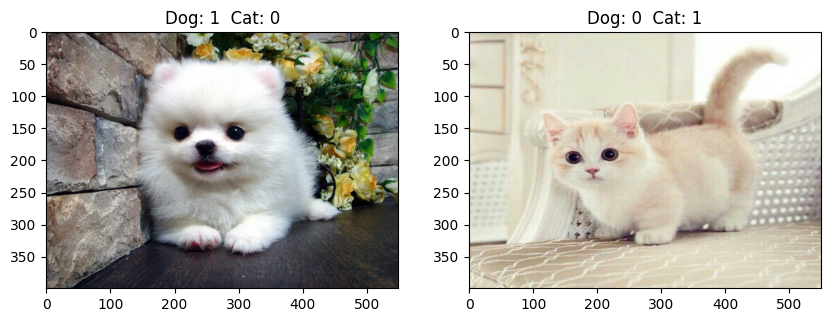

In [ ]:
# ÏõêÎûò Ïù¥ÎØ∏ÏßÄ
show_images([img1, img2],[img1_y, img2_y])

**ÌöåÏ†Ñ (Rotation)**

=== Tensorflow (Keras) ===



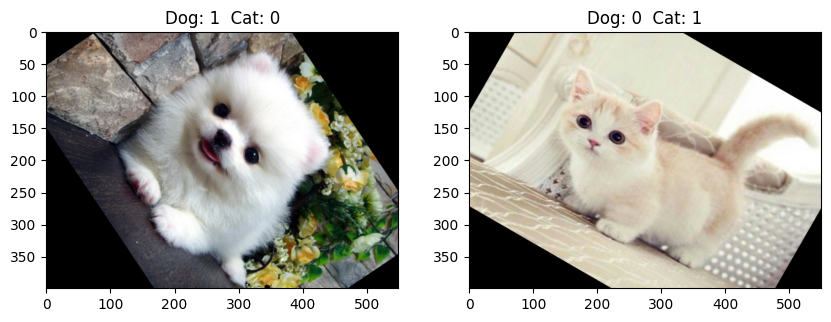


=== Pytorch ===



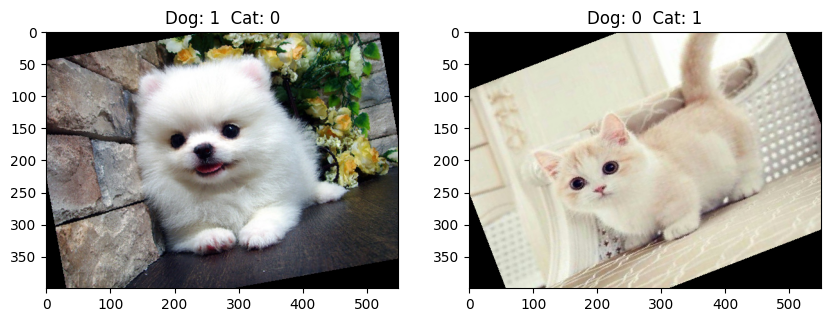

In [ ]:
# Ïù¥ÎØ∏ÏßÄÎ•º ÌöåÏ†ÑÏãúÏºú ÏÉàÎ°úÏö¥ Ïù¥ÎØ∏ÏßÄ ÏÉùÏÑ±
print("=== Tensorflow (Keras) ===\n")
tf_transform = layers.RandomRotation([-1/6,1/6], fill_mode="constant")    # [-1/6,1/6]: (-1/6)*2pi~(1/6)*2pi Î≤îÏúÑÎÇ¥ÏóêÏÑú ÌöåÏ†Ñ
img1_tf = tf_transform(np.asarray(img1), training=True) / 255
img2_tf = tf_transform(np.asarray(img2), training=True) / 255
show_images([img1_tf, img2_tf],[img1_y, img2_y])

print("\n=== Pytorch ===\n")
th_transform = transforms.RandomRotation((-30,30))      # (-30,30): -30ÎèÑ~30ÎèÑ Î≤îÏúÑÎÇ¥ÏóêÏÑú ÌöåÏ†Ñ
img1_th = th_transform(img1)
img2_th = th_transform(img2)
show_images([img1_th, img2_th],[img1_y, img2_y])

**Î∞ùÍ∏∞ (Brightness)**

=== Tensorflow (Keras) ===



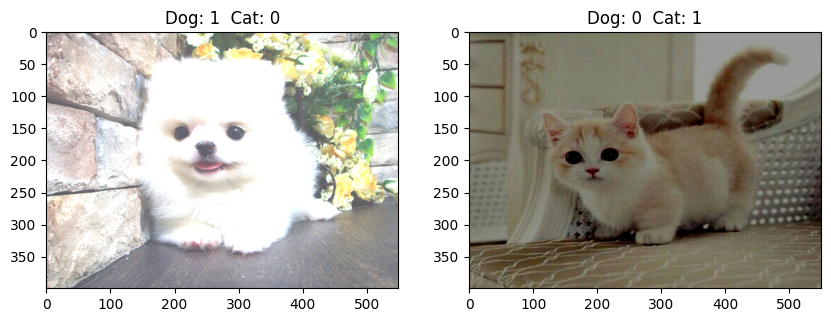


=== Pytorch ===



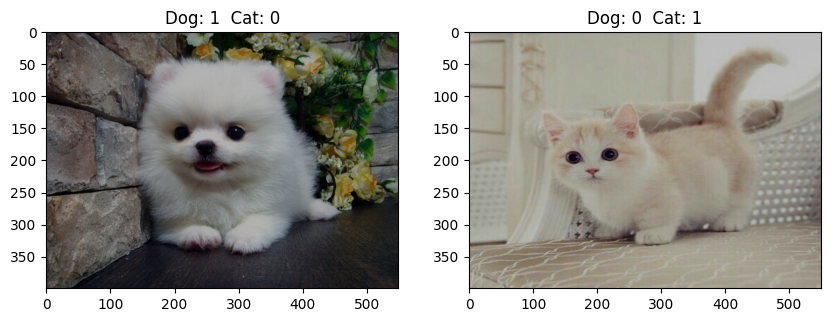

In [ ]:
# Ïù¥ÎØ∏ÏßÄÏùò Î∞ùÍ∏∞Î•º Î≥ÄÌôîÏãúÏºú ÏÉàÎ°úÏö¥ Ïù¥ÎØ∏ÏßÄ ÏÉùÏÑ±
print("=== Tensorflow (Keras) ===\n")
tf_transform = layers.RandomBrightness([-0.5,0.5])     # [-0.5,0.5]: Î∞ùÍ∏∞ Î≥ÄÌôîÏùò ÌïòÌïúÍ∞íÍ≥º ÏÉÅÌïúÍ∞í, ÏµúÎåÄÎ°ú [-1,1]ÍπåÏßÄ Í∞ÄÎä•
img1_tf = tf_transform(np.asarray(img1), training=True) / 255
img2_tf = tf_transform(np.asarray(img2), training=True) / 255
show_images([img1_tf, img2_tf],[img1_y, img2_y])

print("\n=== Pytorch ===\n")
th_transform = transforms.ColorJitter(brightness=[0.3,1])   # [0.3,1]: Î∞ùÍ∏∞ Î≥ÄÌôî Ï†ïÎèÑ Í∞íÏùò Î≤îÏúÑ, ÏñëÏàòÎßå Í∞ÄÎä•
img1_th = th_transform(img1)
img2_th = th_transform(img2)
show_images([img1_th, img2_th],[img1_y, img2_y])

**Mixup**

- 2Í∞úÏùò Îç∞Ïù¥ÌÑ∞Î•º ÏÑ†Ìòï Ï°∞Ìï©ÌïòÏó¨ ÏÉàÎ°úÏö¥ Îç∞Ïù¥ÌÑ∞Î•º ÎßåÎìúÎäî Î∞©Î≤ï
- Îç∞Ïù¥ÌÑ∞Ïùò Î†àÏù¥Î∏îÎèÑ Í∞ôÏùÄ ÎπÑÏú®Î°ú ÏÑ†Ìòï Ï°∞Ìï©

- $ \tilde{x} = \lambda*x_i \; + \; (1-\lambda)*x_j $
<br /> $ \tilde{y} = \lambda*y_i \; + \; (1-\lambda)*y_j $
    - $ x_i, x_j$: Îç∞Ïù¥ÌÑ∞ $ \quad y_i, y_j$: ÏõêÌï´ Ïù∏ÏΩîÎî© Î†àÏù¥Î∏î

In [ ]:
def mixup(x1, x2, y1, y2, lam):

  mix_x = lam*x1 + (1-lam)*x2
  mix_y = lam*y1 + (1-lam)*y2

  return mix_x, mix_y

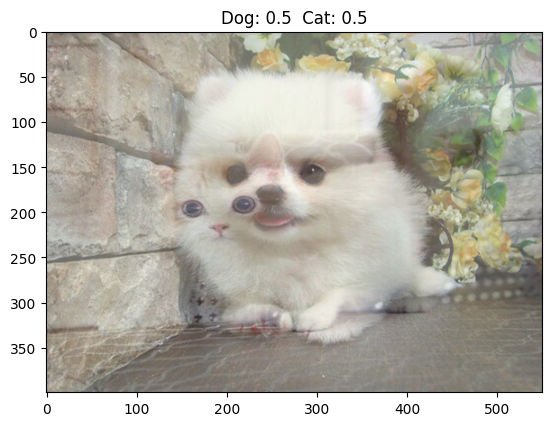

In [ ]:
# Îëê Ïù¥ÎØ∏ÏßÄÎ•º mixupÌïòÏó¨ ÏÉàÎ°úÏö¥ Ïù¥ÎØ∏ÏßÄ ÏÉùÏÑ±
mix_img, mix_y = mixup(np.asarray(img1), np.asarray(img2), img1_y, img2_y, 0.5)   # 0.5: lambda

plt.imshow(mix_img/255)         # Îç∞Ïù¥ÌÑ∞ Í∞íÏùò Î≤îÏúÑÎ•º 0~1 ÏÇ¨Ïù¥Î°ú Î≥ÄÍ≤Ω
plt.title(f"Dog: {mix_y[0]}  Cat: {mix_y[1]}")
plt.show()

ÏúÑ Î∞©Î≤ïÎì§ Ïù¥Ïô∏ÏóêÎèÑ Îã§ÏñëÌïú Îç∞Ïù¥ÌÑ∞ Ï¶ùÍ∞ï Î∞©Î≤ïÎì§Ïù¥ ÏûàÏùå